# NETFLIX로 알아보는 문화 트렌드
---
0. [NETFILX 소개](#0-netfilx-소개)

1. [데이터 수집](#1-데이터-수집)
    - Netflix_Data
    - Netflix_Original Data
    - Rating_Data
    - Netflix_Data + Netflix_Original Data + Rating_Data
2. [데이터 전처리](#2-데이터-전처리)
    - 결측치 수정 및 제거
    - Feature engineering
3. [데이터 EDA](#`)
    - Netflix content distribution by country(with folium)
    - Netflix의 성장과정(WITH STOCK DATA)
    - 시대별 Trend(with Wordcloud)
    - Netflix Original vs Others
4. 결론

🎈 번외
    - 가장 Score가 높은 배우는????
    - 가장 Score가 높은 감독은????

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
import folium

print(folium.__version__)
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings(action='ignore')


0.12.1.post1


## 0. NETFILX 소개

# NETFILX <img align = "right" src ='https://itep.sfo2.digitaloceanspaces.com/Netflix-blog-cover.jpg'>
설립 : 1997. 8. 29.  
주요사업 : OTT(Over-The-Top media service)  
시가총액 : 1592억$  
창업자 : Wilmot Reed Hastings, Jr.

## 1. 데이터 수집
---


### Netflix_Data
</br>
__✅COLUMNS__
</br>

| SHOW_ID | 영화나 티비쇼의 고유번호  |
| --- | --- |
| TYPE | 영화인지 티비쇼인지 구별 |
| TITLE | 영화, 티비쇼의 제목 |
| DIRECTOR | 영화감독 |
| CAST | 영화, 쇼에 출연한 배우들 |
| COUNTRY | 영화나 쇼가 제작된 나라 |
| DATE_ADDED | 넷플릭스에 드라마나 영화가 방영된 날짜. 2008.01 ~ 2021.09.25 |
| RELEASE_YEAR | 실제 드라마나 영화가 방영된 연도. 1925 ~ 2021 |
| RATING | 영화/쇼의 시청 등급 |
| DURATION | 방영기간 |
| LISTED_IN | 장르 |
| DESCRIPTION | 줄거리 |



In [160]:
path = '../data'
Net_df = pd.read_csv(path+"/fixed_netflix_df.csv")
Net_df.head()

show_id     type             director                  title  \
0      s1    Movie      Kirsten Johnson   Dick Johnson Is Dead   
1      s2  TV Show       Nosipho Dumisa          Blood & Water   
2      s3  TV Show      Julien Leclercq              Ganglands   
3      s4  TV Show  Jacquelyn C. Migdal  Jailbirds New Orleans   
4      s5  TV Show         Raghav Subbu           Kota Factory   

                                                cast        country  \
0  Michael Hilow, Dick Johnson, Chad Knorr, Vasth...  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France   
3                                               NONE  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added                                        description  \
0  September 25, 2021  As her father nears the end of his life, filmm...   
1  September 24, 2021  After crossing paths at a party, a Cape Town t...   
2  September 24, 2021  To protect his family from a powerful drug lor...   
3  September 24, 2021  Feuds, flirtations and toilet talk go down amo...   
4  September 24, 2021  In a city of coaching centers known to train I...   

    duration                                          listed_in rating  \
0     90 min                                      Documentaries  PG-13   
1  2 Seasons    International TV Shows, TV Dramas, TV Mysteries  TV-MA   
2   1 Season  Crime TV Shows, International TV Shows, TV Act...  TV-MA   
3   1 Season                             Docuseries, Reality TV  TV-MA   
4  2 Seasons  International TV Shows, Romantic TV Shows, TV ...  TV-MA   

   release_year  
0          2020  
1          2021  
2          2021  
3          2021  
4          2021

### Netflix_Original Data
</br>  
__✅ COLUMNS__  
</br>  

| TITEL | 영화, 티비쇼의 제목  |
| --- | --- |
| GENRE | 영화, 티비쇼의 장르 |
| PREMIERE | 드라마나 영화가 방영된 날짜 |
| RUNTIME | 방영기간 |
| IMDB SCORE | IMDB에서의 평점 |
| LANGUAGE | 제작언어 |

In [161]:
OG_df = pd.read_csv(path+"/NetflixOriginals.csv", encoding="ISO-8859-1")
OG_df.head()

Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi

In [162]:
# 넷플릭스 Original 인지 여부만 따지기 위해 Title만 사용
OG_df = OG_df["Title"].tolist()

### Rating_Data
</br>  
__✅ COLUMNS__  
</br>  

| TITEL | 영화, 티비쇼의 제목  |
| --- | --- |
| AVG | 영화, 티비쇼의 평균 평점 |
| TOTAL | 총 평점 합 |
| ALL ~| 평점을 매긴 전체 시청자수(연령별) |
| MALES ~  | 평점을 매긴 남성 시청자수(연령별) |
| FEMAELS ~ | 평점을 매긴 여성 시청자수(연령별) |
| ALL_RANK ~| 전체 시청자수(연령별)의 평점 |
| MAELS_RANK ~ | 남성 시청자수(연령별)의 평점 |
| FEMAELS_RANK ~ | 여성 시청자수(연령별)의 평점 |


In [163]:
Rating_df = pd.read_csv("../data/Netflix_Rating.csv")
Rating_df.head()


Title  Avg    Total  Total_males  Total_Females  \
0   Dick Johnson Is Dead  7.4   6241.0       3780.0          592.0   
1          Blood & Water  6.7   2952.0        603.0          867.0   
2              Ganglands  7.0   2349.0       1297.0          117.0   
3  Jailbirds New Orleans  6.7    194.0         57.0           60.0   
4           Kota Factory  9.3  66527.0      19278.0          984.0   

   All_below_18  All_18_29  All_30_44  All_over_45  Males_below_18  ...  \
0          12.0     1050.0     2321.0        817.0            10.0  ...   
1          10.0      416.0      644.0        281.0             4.0  ...   
2           1.0       99.0      574.0        648.0             1.0  ...   
3           0.0       19.0       63.0         30.0             0.0  ...   
4         144.0    10004.0     5687.0        340.0           134.0  ...   

   Males_rank_below_18  Males_rank_18_29  Males_rank_30_44  \
0                  7.9               7.7               7.4   
1                  5.5               6.6               5.9   
2                  6.0               6.9               6.8   
3                  0.0               6.4               6.3   
4                  9.6               9.2               8.5   

   Males_rank_over_45  Females_rank_below_18  Females_rank_18_29  \
0                 7.1                    8.0                 7.8   
1                 4.9                    5.0                 6.9   
2                 7.0                    0.0                 5.8   
3                 6.6                    0.0                 6.2   
4                 6.4                    4.3                 9.2   

   Females_rank_30_44 Females_rank_over_45  Avg_rank_males  Avg_rank_Females  
0                 7.4                  7.3             7.4               7.5  
1                 7.0                  7.0             5.9               7.0  
2                 6.9                  7.0             6.9               7.0  
3                 6.9                  6.9             6.5               6.9  
4                 7.5                  5.7             9.0               8.5  

[5 rows x 32 columns]

### Netflix_Data + Netflix_Original Data +  Rating_Data

In [164]:
# Netflix_Data + Netflix_Original Data
og = []
for name in Net_df.title.values:
    if name in OG_df:
        og.append(1)
    else:
        og.append(0)

Net_df["Original"] = og
Net_df["Original"].value_counts()

0    8301
1     506
Name: Original, dtype: int64

In [165]:
# Netfilx_Data +  Raing_Data
df = pd.merge(Net_df, Rating_df, left_on= "title", right_on= "Title")
df.head()

show_id     type             director                  title  \
0      s1    Movie      Kirsten Johnson   Dick Johnson Is Dead   
1      s2  TV Show       Nosipho Dumisa          Blood & Water   
2      s3  TV Show      Julien Leclercq              Ganglands   
3      s4  TV Show  Jacquelyn C. Migdal  Jailbirds New Orleans   
4      s5  TV Show         Raghav Subbu           Kota Factory   

                                                cast        country  \
0  Michael Hilow, Dick Johnson, Chad Knorr, Vasth...  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France   
3                                               NONE  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added                                        description  \
0  September 25, 2021  As her father nears the end of his life, filmm...   
1  September 24, 2021  After crossing paths at a party, a Cape Town t...   
2  September 24, 2021  To protect his family from a powerful drug lor...   
3  September 24, 2021  Feuds, flirtations and toilet talk go down amo...   
4  September 24, 2021  In a city of coaching centers known to train I...   

    duration                                          listed_in  ...  \
0     90 min                                      Documentaries  ...   
1  2 Seasons    International TV Shows, TV Dramas, TV Mysteries  ...   
2   1 Season  Crime TV Shows, International TV Shows, TV Act...  ...   
3   1 Season                             Docuseries, Reality TV  ...   
4  2 Seasons  International TV Shows, Romantic TV Shows, TV ...  ...   

  Males_rank_below_18  Males_rank_18_29  Males_rank_30_44 Males_rank_over_45  \
0                 7.9               7.7               7.4                7.1   
1                 5.5               6.6               5.9                4.9   
2                 6.0               6.9               6.8                7.0   
3                 0.0               6.4               6.3                6.6   
4                 9.6               9.2               8.5                6.4   

   Females_rank_below_18  Females_rank_18_29  Females_rank_30_44  \
0                    8.0                 7.8                 7.4   
1                    5.0                 6.9                 7.0   
2                    0.0                 5.8                 6.9   
3                    0.0                 6.2                 6.9   
4                    4.3                 9.2                 7.5   

   Females_rank_over_45  Avg_rank_males  Avg_rank_Females  
0                   7.3             7.4               7.5  
1                   7.0             5.9               7.0  
2                   7.0             6.9               7.0  
3                   6.9             6.5               6.9  
4                   5.7             9.0               8.5  

[5 rows x 45 columns]

## 2. 데이터 전처리

- 입력오류 확인 및 처리
- 결측치 수정 및 제거
    - 결측치 확인 및 크롤링으로 추가
    - 확인되지 않는 행 제거
    - 사용하지 않는 컬럼 제거
- Feature engineering
    - 영화 관람 등급, 티비 관람 등급
    - score(평점, 리뷰 수)...
        

### 입력오류 확인 및 처리

In [166]:
# 각 칼럼별 unique값을 확인해 보기
# col = df.columns
# uni_list = [{col[i]:df[col[i]].unique()} for i in range(len(col))]
# for i in range(len(col)):
#     print(uni_list[i])

In [167]:
# rating 칼럼에서 발생한 입력오류 처리
index = df[df['rating'] == '66 min'].index 
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

index = df[df['rating'] == '74 min'].index
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

index = df[df['rating'] == '84 min'].index
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

### 결측치 수정 및 제거

[Netflix raw 데이터에서 director, cast, country 칼럼의 결측값 채우기 - Crawling]('https://github.com/DONGYEONKANG/Datathon/blob/main/dongyeon/Missing_data_crawler.ipynb')

|First Image|Second Image|
|:-:|:-:|
|<img src = '../data/crawling.png' width ="300" height = "220">|<img src = '../data/crawling2.png' width ="300" height = "220">|
|First Image|Second Image|
|<img src = '../data/crawling3.png' width ="300" height = "220">|<img src = '../data/crawling4.png' width ="300" height = "220">|


[Netflix 평점 데이터 추가하기 - Crawling](https://github.com/DONGYEONKANG/Datathon/blob/main/dongyeon/Rating_data_crawler.ipynb)

|First Image|Second Image|Third Image|
|:-:|:-:|:-:|
|<img src = '../data/crawling2-1.png' width ="300" height = "220">|<img src = '../data/crawling2-2.png' width ="300" height = "220">|<img src = '../data/crawling2-3.png' width ="300" height = "220">|


##### NOT FOUND & NO RATINGS 제거

In [168]:
# NOT FOUND 제거
df.drop(df[df["Title_ID"] == "NOT FOUND"].index, inplace=True)
df = df.reset_index(drop=True)

In [169]:
#NO RATINGS
df.drop(df[df["Avg"] == 0].index, inplace=True)
df.reset_index(drop=True)

show_id     type             director                  title  \
0         s1    Movie      Kirsten Johnson   Dick Johnson Is Dead   
1         s2  TV Show       Nosipho Dumisa          Blood & Water   
2         s3  TV Show      Julien Leclercq              Ganglands   
3         s4  TV Show  Jacquelyn C. Migdal  Jailbirds New Orleans   
4         s5  TV Show         Raghav Subbu           Kota Factory   
...      ...      ...                  ...                    ...   
8425   s8803    Movie        David Fincher                 Zodiac   
8426   s8804  TV Show          Jiyeon Park            Zombie Dumb   
8427   s8805    Movie      Ruben Fleischer             Zombieland   
8428   s8806    Movie         Peter Hewitt                   Zoom   
8429   s8807    Movie          Mozez Singh                 Zubaan   

                                                   cast  \
0     Michael Hilow, Dick Johnson, Chad Knorr, Vasth...   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                  NONE   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
...                                                 ...   
8425  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8426                                               NONE   
8427  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8428  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8429  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                              country          date_added  \
0                       United States  September 25, 2021   
1                        South Africa  September 24, 2021   
2                              France  September 24, 2021   
3                       United States  September 24, 2021   
4                               India  September 24, 2021   
...                               ...                 ...   
8425                    United States   November 20, 2019   
8426  Production Company Project Page        July 1, 2019   
8427                    United States    November 1, 2019   
8428                    United States    January 11, 2020   
8429                            India       March 2, 2019   

                                            description   duration  \
0     As her father nears the end of his life, filmm...     90 min   
1     After crossing paths at a party, a Cape Town t...  2 Seasons   
2     To protect his family from a powerful drug lor...   1 Season   
3     Feuds, flirtations and toilet talk go down amo...   1 Season   
4     In a city of coaching centers known to train I...  2 Seasons   
...                                                 ...        ...   
8425  A political cartoonist, a crime reporter and a...    158 min   
8426  While living alone in a spooky town, a young g...  2 Seasons   
8427  Looking to survive in a world taken over by zo...     88 min   
8428  Dragged from civilian life, a former superhero...     88 min   
8429  A scrappy but poor boy worms his way into a ty...    111 min   

                                              listed_in  ...  \
0                                         Documentaries  ...   
1       International TV Shows, TV Dramas, TV Mysteries  ...   
2     Crime TV Shows, International TV Shows, TV Act...  ...   
3                                Docuseries, Reality TV  ...   
4     International TV Shows, Romantic TV Shows, TV ...  ...   
...                                                 ...  ...   
8425                     Cult Movies, Dramas, Thrillers  ...   
8426             Kids' TV, Korean TV Shows, TV Comedies  ...   
8427                            Comedies, Horror Movies  ...   
8428                 Children & Family Movies, Comedies  ...   
8429     Dramas, International Movies, Music & Musicals  ...   

     Males_rank_below_18  Males_rank_18_29  Males_rank_30_44  \
0                    7.9               7.7               7.4

##### rating data 제거 & date_added 제거 & 사용하지 않는 컬럼 제거

In [170]:
# 없는 rating data 제거 , 8807 - 202 - 10(중복있을듯 아마...) = 8598 
df.drop(df[df["rating"].isnull()].index, inplace=True)
df = df.reset_index(drop=True)

df.drop(df[df["date_added"].isnull()].index, inplace=True)
df = df.reset_index(drop=True)

In [171]:
# 사용하지 않는 컬럼 제거
# show_id
# Title_ID

df.drop(["show_id", "Title_ID"], axis = 1, inplace=True)
df.head()

type             director                  title  \
0    Movie      Kirsten Johnson   Dick Johnson Is Dead   
1  TV Show       Nosipho Dumisa          Blood & Water   
2  TV Show      Julien Leclercq              Ganglands   
3  TV Show  Jacquelyn C. Migdal  Jailbirds New Orleans   
4  TV Show         Raghav Subbu           Kota Factory   

                                                cast        country  \
0  Michael Hilow, Dick Johnson, Chad Knorr, Vasth...  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France   
3                                               NONE  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added                                        description  \
0  September 25, 2021  As her father nears the end of his life, filmm...   
1  September 24, 2021  After crossing paths at a party, a Cape Town t...   
2  September 24, 2021  To protect his family from a powerful drug lor...   
3  September 24, 2021  Feuds, flirtations and toilet talk go down amo...   
4  September 24, 2021  In a city of coaching centers known to train I...   

    duration                                          listed_in rating  ...  \
0     90 min                                      Documentaries  PG-13  ...   
1  2 Seasons    International TV Shows, TV Dramas, TV Mysteries  TV-MA  ...   
2   1 Season  Crime TV Shows, International TV Shows, TV Act...  TV-MA  ...   
3   1 Season                             Docuseries, Reality TV  TV-MA  ...   
4  2 Seasons  International TV Shows, Romantic TV Shows, TV ...  TV-MA  ...   

   Males_rank_below_18  Males_rank_18_29 Males_rank_30_44  Males_rank_over_45  \
0                  7.9               7.7              7.4                 7.1   
1                  5.5               6.6              5.9                 4.9   
2                  6.0               6.9              6.8                 7.0   
3                  0.0               6.4              6.3                 6.6   
4                  9.6               9.2              8.5                 6.4   

   Females_rank_below_18  Females_rank_18_29  Females_rank_30_44  \
0                    8.0                 7.8                 7.4   
1                    5.0                 6.9                 7.0   
2                    0.0                 5.8                 6.9   
3                    0.0                 6.2                 6.9   
4                    4.3                 9.2                 7.5   

   Females_rank_over_45  Avg_rank_males  Avg_rank_Females  
0                   7.3             7.4               7.5  
1                   7.0             5.9               7.0  
2                   7.0             6.9               7.0  
3                   6.9             6.5               6.9  
4                   5.7             9.0               8.5  

[5 rows x 43 columns]

#### 최종 데이터 

In [172]:
# 최종 데이터
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   8413 non-null   object 
 1   director               8413 non-null   object 
 2   title                  8413 non-null   object 
 3   cast                   8413 non-null   object 
 4   country                8413 non-null   object 
 5   date_added             8413 non-null   object 
 6   description            8413 non-null   object 
 7   duration               8413 non-null   object 
 8   listed_in              8413 non-null   object 
 9   rating                 8413 non-null   object 
 10  release_year           8413 non-null   int64  
 11  Original               8413 non-null   int64  
 12  Title                  8413 non-null   object 
 13  Avg                    8413 non-null   float64
 14  Total                  8413 non-null   float64
 15  Tota

### Feature engineering

type columns
- 영화: 0
- 티비쇼: 1

In [173]:
def type_col(col):
    if col == 'Movie':
        return 0
    else:
        return 1
    

In [174]:
df['type'] = df["type"].apply(type_col)
df.head()

type             director                  title  \
0     0      Kirsten Johnson   Dick Johnson Is Dead   
1     1       Nosipho Dumisa          Blood & Water   
2     1      Julien Leclercq              Ganglands   
3     1  Jacquelyn C. Migdal  Jailbirds New Orleans   
4     1         Raghav Subbu           Kota Factory   

                                                cast        country  \
0  Michael Hilow, Dick Johnson, Chad Knorr, Vasth...  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France   
3                                               NONE  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added                                        description  \
0  September 25, 2021  As her father nears the end of his life, filmm...   
1  September 24, 2021  After crossing paths at a party, a Cape Town t...   
2  September 24, 2021  To protect his family from a powerful drug lor...   
3  September 24, 2021  Feuds, flirtations and toilet talk go down amo...   
4  September 24, 2021  In a city of coaching centers known to train I...   

    duration                                          listed_in rating  ...  \
0     90 min                                      Documentaries  PG-13  ...   
1  2 Seasons    International TV Shows, TV Dramas, TV Mysteries  TV-MA  ...   
2   1 Season  Crime TV Shows, International TV Shows, TV Act...  TV-MA  ...   
3   1 Season                             Docuseries, Reality TV  TV-MA  ...   
4  2 Seasons  International TV Shows, Romantic TV Shows, TV ...  TV-MA  ...   

   Males_rank_below_18  Males_rank_18_29 Males_rank_30_44  Males_rank_over_45  \
0                  7.9               7.7              7.4                 7.1   
1                  5.5               6.6              5.9                 4.9   
2                  6.0               6.9              6.8                 7.0   
3                  0.0               6.4              6.3                 6.6   
4                  9.6               9.2              8.5                 6.4   

   Females_rank_below_18  Females_rank_18_29  Females_rank_30_44  \
0                    8.0                 7.8                 7.4   
1                    5.0                 6.9                 7.0   
2                    0.0                 5.8                 6.9   
3                    0.0                 6.2                 6.9   
4                    4.3                 9.2                 7.5   

   Females_rank_over_45  Avg_rank_males  Avg_rank_Females  
0                   7.3             7.4               7.5  
1                   7.0             5.9               7.0  
2                   7.0             6.9               7.0  
3                   6.9             6.5               6.9  
4                   5.7             9.0               8.5  

[5 rows x 43 columns]

rating col
- 전체관람가('G', 'PG', 'TV-Y', 'TV-7', 'TV-Y7-FV', 'TV-G'): 0
- 12,15세 관람가('PG-13', 'TV-PG', 'TV-14'): 1
- 15, 청불('R', 'NC-17', 'NR', 'UR', 'TV-MA'): 2 

In [175]:
def rating_col(col):
    if col in ['G', 'PG', 'TV-Y','TV-Y7', 'TV-Y7-FV', 'TV-G']:
        return 0
    elif col in ['PG-13', 'TV-PG', 'TV-14']:
        return 1
    elif col in ['R', 'NC-17', 'NR', 'UR', 'TV-MA']:
        return 2
    else:
        return col

In [176]:
df['rating'] = df["rating"].apply(rating_col)
df['rating']

0       1
1       2
2       2
3       2
4       2
       ..
8408    2
8409    0
8410    2
8411    0
8412    1
Name: rating, Length: 8413, dtype: int64

### Score : 평점 * 리뷰 수
- 평점과 총 리뷰수를 곱하여 하나의 흥행의 기준을 만듬

In [177]:
df["Score"] = df["Avg"] * df["Total"] 
df["Score_normal"] = (df["Score"] - df["Score"].mean())/df["Score"].std() + 1 #정규화

## 3. Data EDA
- folium 사용해서 Country 시각화 조져보기!

In [178]:
from folium.plugins import MarkerCluster

cntry = []
cntry_strip = []
for i in df["country"].str.split(","):
    cntry += i
    
for cnty in cntry:
#     print(cnty.strip())
    cntry_strip.append(cnty.strip())
    
country = pd.Series(cntry_strip, name = "country")
cnt_country = pd.Series(cntry_strip).value_counts()

In [179]:
world = pd.read_csv("../data/worldcities.csv")
world = world[["city", "country", "lat", "lng"]]
uni_world = world.drop_duplicates("country")
country_lat_lng = pd.merge(country, uni_world, on = "country")
# country_lat_lng.value_counts()[:10]

In [180]:
# 위도(latitude) 경도(longitude)
latitude = country_lat_lng['lat']
longitude = country_lat_lng['lng']

Y = 37.5722440
X = 126.9759352
main_location = (Y, X) 

m = folium.Map(location=main_location, zoom_start=4, tiles='cartodbpositron')

marker_cluster = MarkerCluster().add_to(m)

for x,y in zip(latitude, longitude):
    folium.Marker([x,y], icon = folium.Icon(color = "green")).add_to(marker_cluster)
# m

### 넷플릭스 주식 데이터기반 추이 확인

In [181]:
df.columns

Index(['type', 'director', 'title', 'cast', 'country', 'date_added',
       'description', 'duration', 'listed_in', 'rating', 'release_year',
       'Original', 'Title', 'Avg', 'Total', 'Total_males', 'Total_Females',
       'All_below_18', 'All_18_29', 'All_30_44', 'All_over_45',
       'Males_below_18', 'Males_18_29', 'Males_30_44', 'Males_over_45',
       'Females_below_18', 'Females_18_29', 'Females_30_44', 'Females_over_45',
       'All_rank_below_18', 'All_rank_18_29', 'All_rank_30_44',
       'All_rank_over_45', 'Males_rank_below_18', 'Males_rank_18_29',
       'Males_rank_30_44', 'Males_rank_over_45', 'Females_rank_below_18',
       'Females_rank_18_29', 'Females_rank_30_44', 'Females_rank_over_45',
       'Avg_rank_males', 'Avg_rank_Females', 'Score', 'Score_normal'],
      dtype='object')

In [182]:
df2 = df.__deepcopy__()
df2['date_added'] = df2['date_added'].astype('datetime64')
df2[df2['date_added'].isna()]
df2.drop(df2[df2["date_added"].isnull()].index, inplace=True)
df2 = df2.reset_index(drop=True)
df2['year'] = df2['date_added'].dt.strftime('%Y')
df2['year'] = df2['date_added'].dt.strftime('%Y')
stock_data = pd.read_csv(path+'/netflix_stock.csv').iloc[:,1:]
stock_data['Date'] = stock_data['Date'].astype('datetime64')
stock_data['year'] = stock_data['Date'].dt.year
# stock_data.groupby('year').mean()['Close'].index
# df2.groupby('year').count().index.astype(int)
# df2.groupby('year').sum()['Original']/df2.groupby('year').size()
# df2.groupby('year').size()

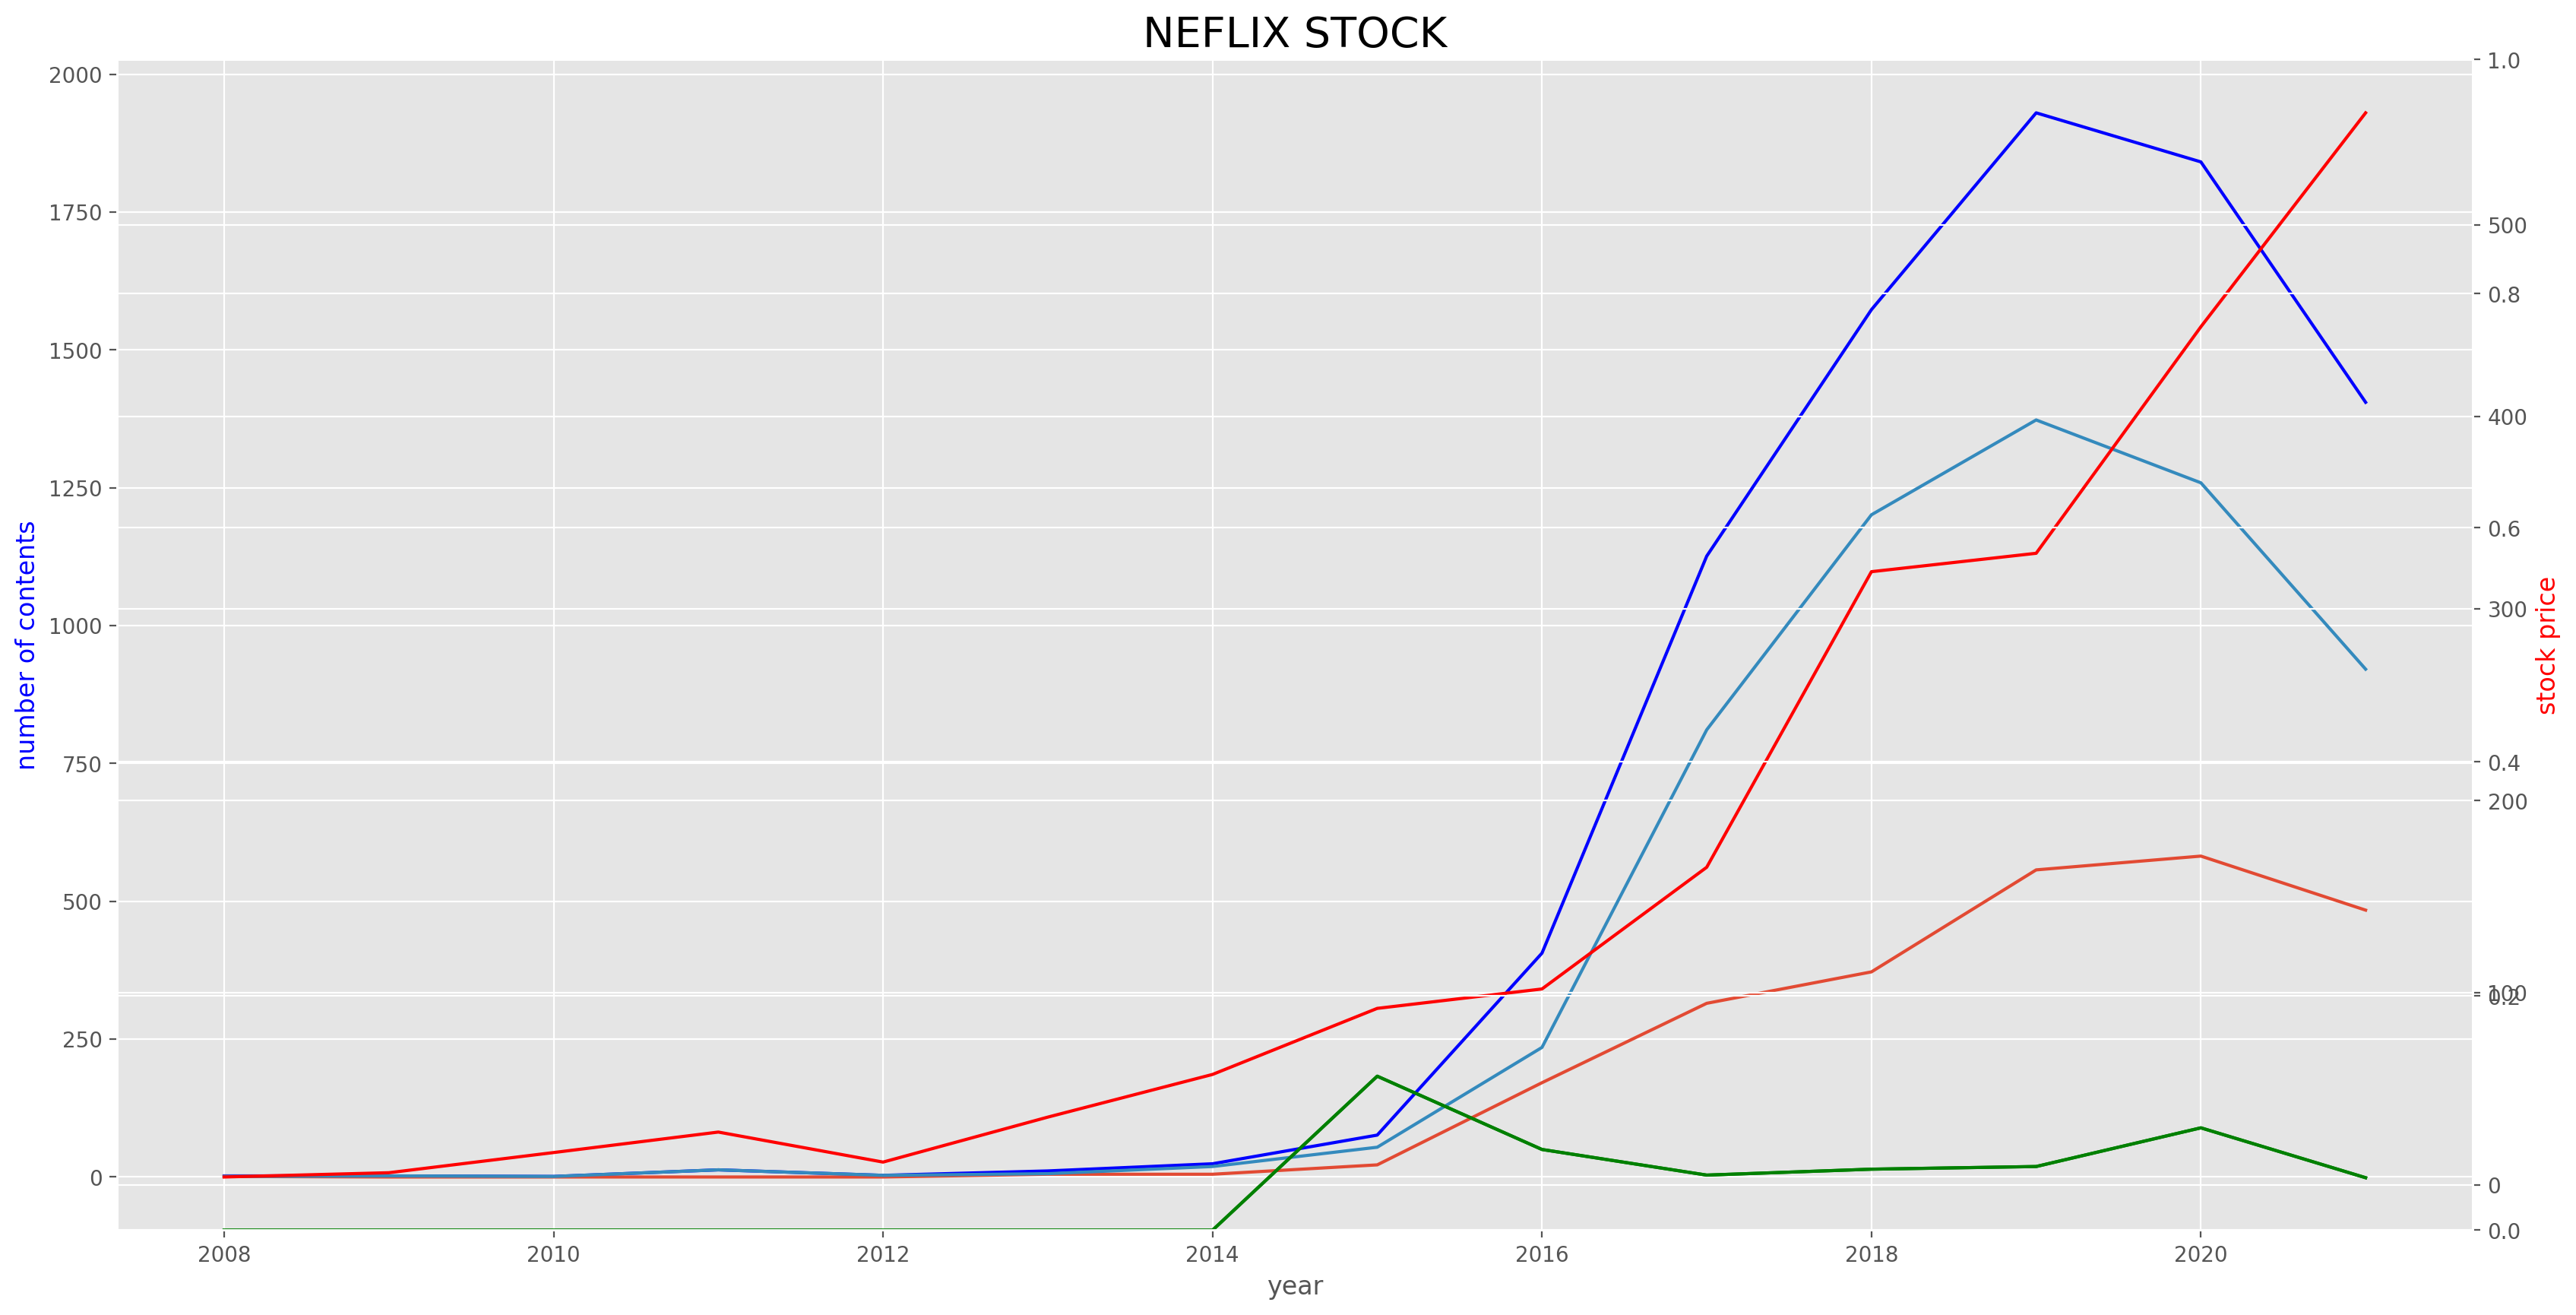

In [183]:

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df2.groupby('year').count().index.astype(int),df2.groupby('year').size(),color = color1)
ax1.plot(df2.groupby('year').count().index.astype(int),df2.groupby('year').sum()['type'])
ax1.plot(df2.groupby('year').count().index.astype(int),df2.groupby('year').size()-df2.groupby('year').sum()['type'])
ax1.set_xlabel('year')
ax1.set_ylabel('number of contents',color = color1)


color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(stock_data.groupby('year').mean()['Close'].index,stock_data.groupby('year').mean()['Close'],color=color2)
ax2.set_ylabel('stock price',color = color2)

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(stock_data.groupby('year').mean()['Close'].index,df2.groupby('year').sum()['Original']/df2.groupby('year').size(),color=color3)
ax3.plot(stock_data.groupby('year').mean()['Close'].index,df2.groupby('year').sum()['Original']/df2.groupby('year').size(),color=color3)

ax3.set_ylim([0,1])

plt.title("NEFLIX STOCK", fontsize = 20)
plt.show()

### 전반적인 영화 및 TV 트렌드 추이 (??????)

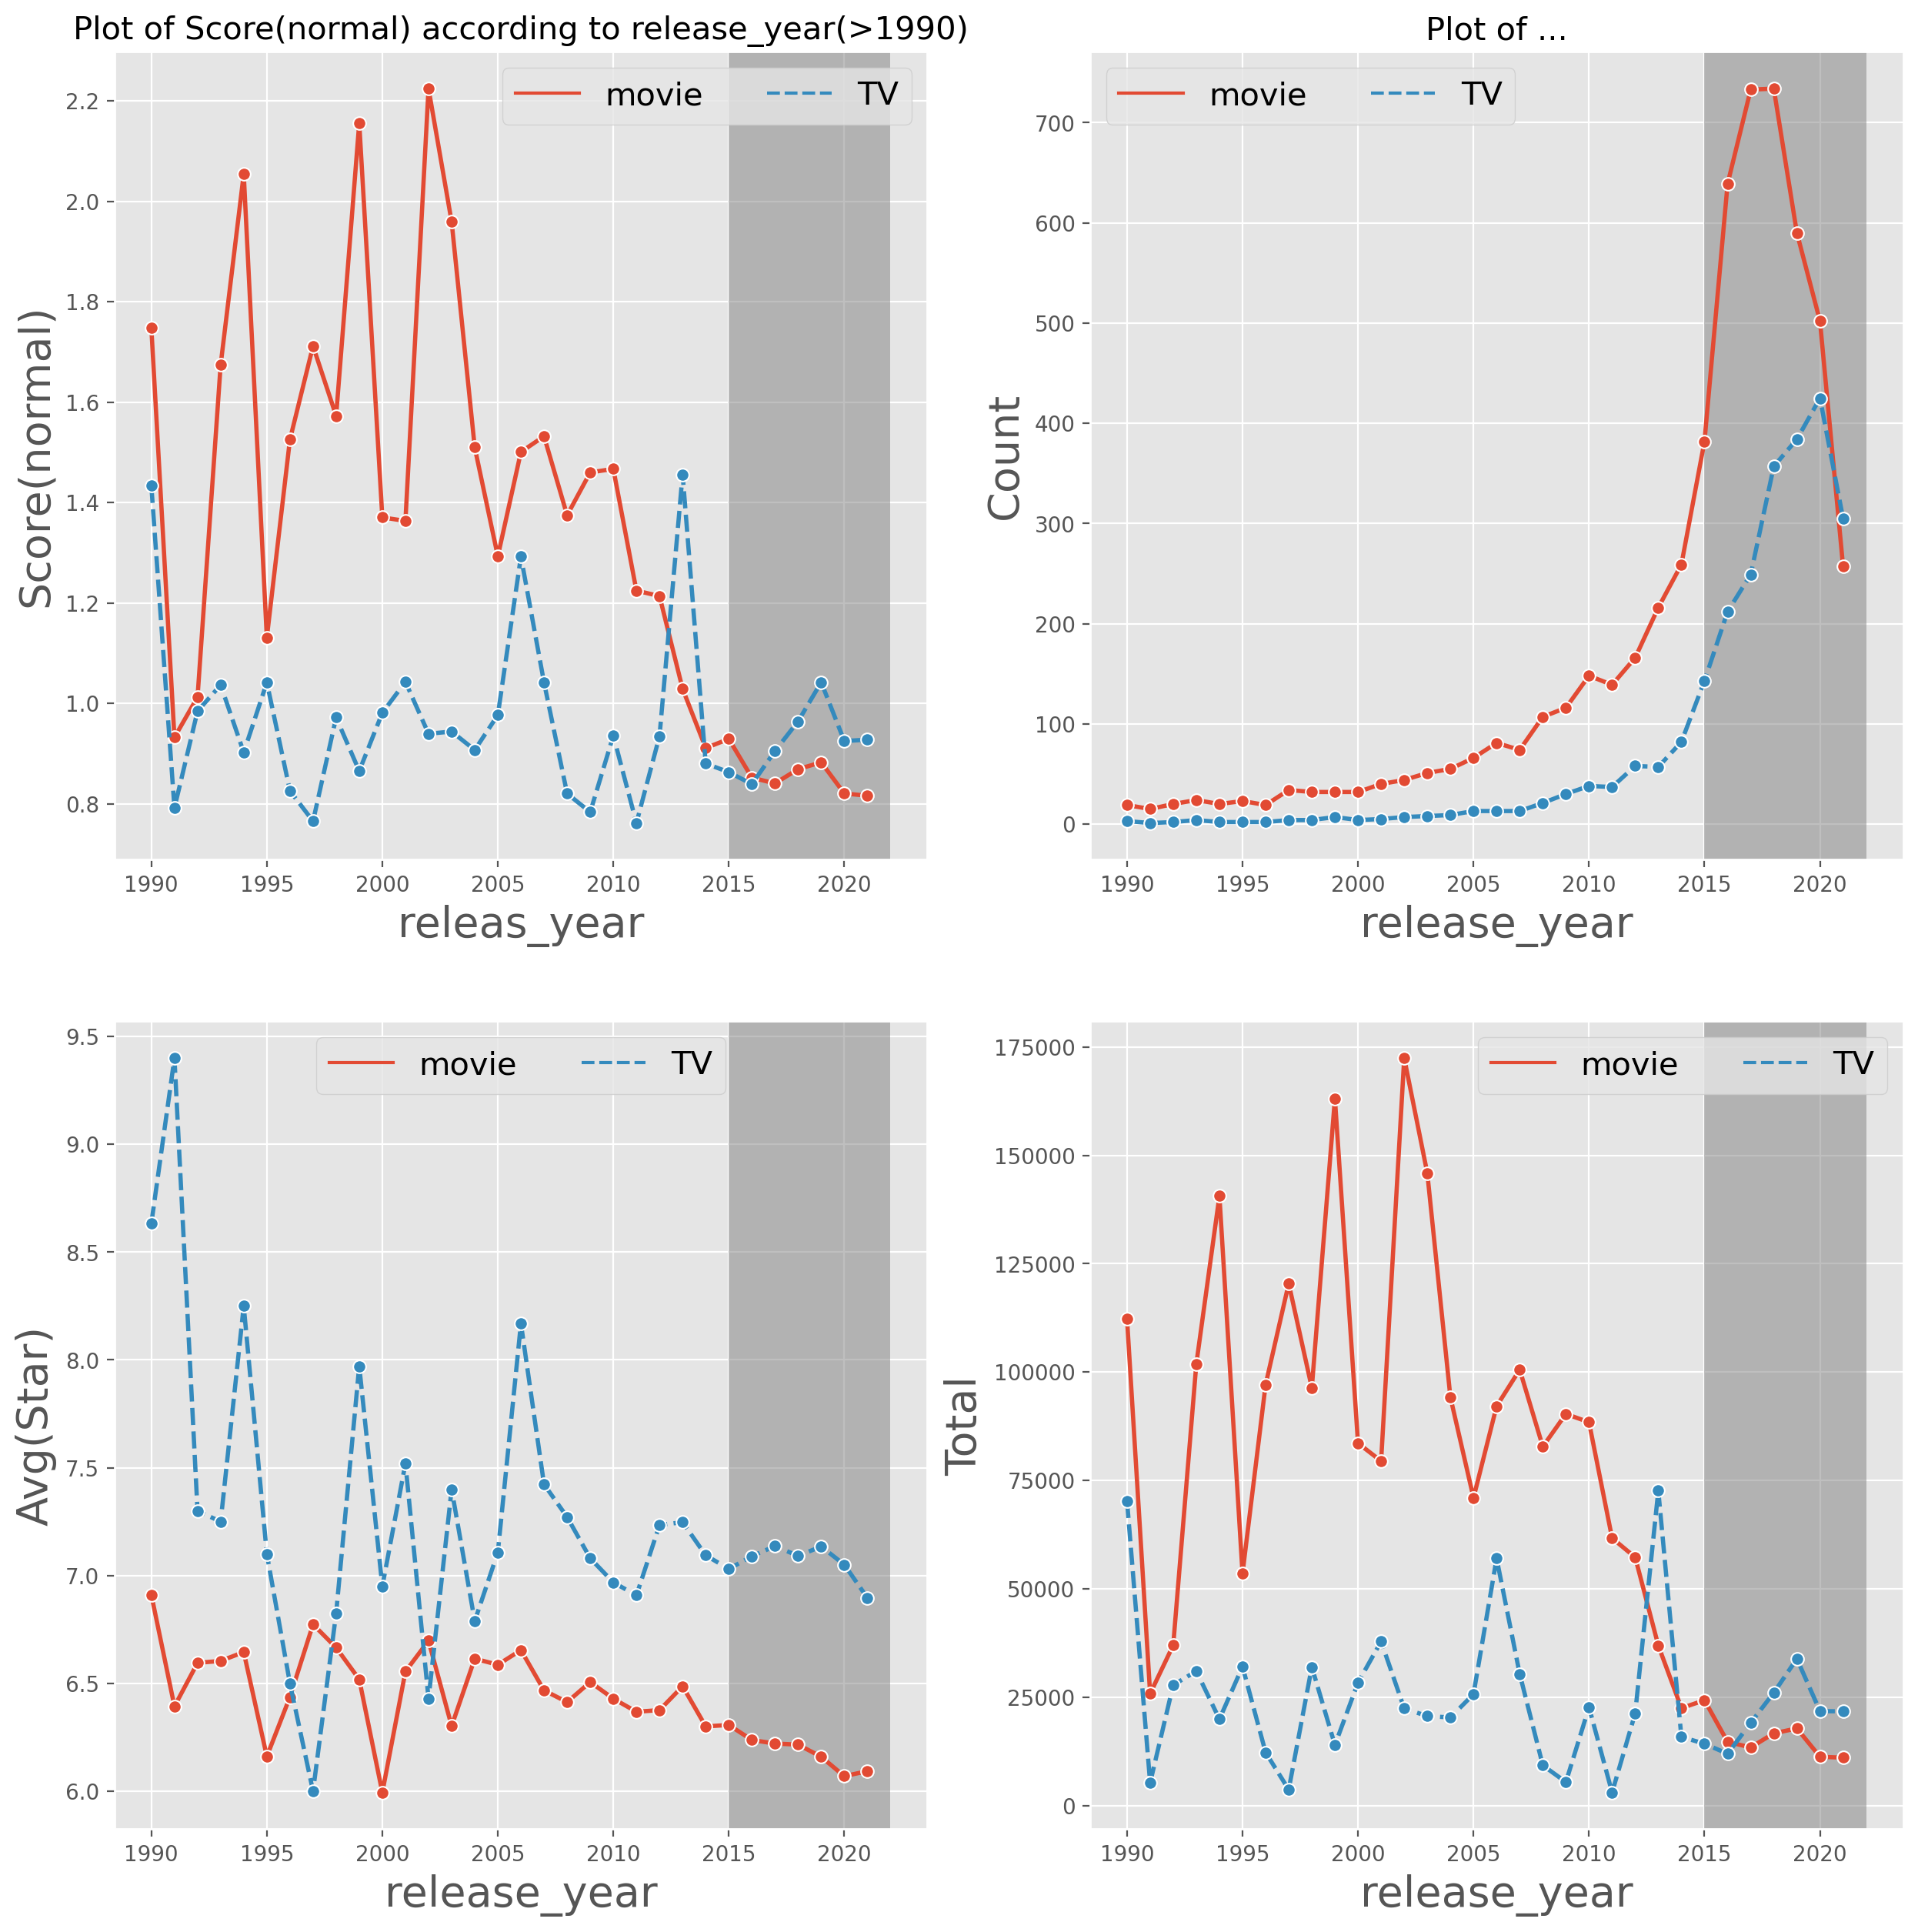

In [184]:
year_type_df = df.groupby(["type", "release_year"])["Score_normal"].mean().unstack().rename(index = {0:"movie", 1:"TV"})
year_type_cnt_df = df.groupby(["type", "release_year"])["Score_normal"].count().unstack().rename(index = {0:"movie", 1:"TV"})
year_type_avg_df = df.groupby(["type", "release_year"])["Avg"].mean().unstack().rename(index = {0:"movie", 1:"TV"})
year_type_total_df = df.groupby(["type", "release_year"])["Total"].mean().unstack().rename(index = {0:"movie", 1:"TV"})

# 90년대 이후 데이터로만
cols = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
year_type_df = year_type_df[cols]
year_type_cnt_df = year_type_cnt_df[cols]
year_type_avg_df = year_type_avg_df[cols]
year_type_total_df = year_type_total_df[cols]


plt.figure(figsize=(15,15))
# year_type_df.T.plot(marker = "o",figsize = (10,10))

plt.subplot(221)
sns.lineplot(data = year_type_df.T, marker = "o", linewidth=2)
plt.title("Plot of Score(normal) according to release_year(>1990)", fontsize= 15)
plt.legend(loc='best', ncol = 2, fontsize = 15, frameon=True)
plt.xlabel("releas_year",fontsize = 20)
plt.ylabel("Score(normal)" ,fontsize = 20)
plt.axvspan(2015, 2022, facecolor='gray', alpha = 0.5)


plt.subplot(222)
sns.lineplot(data=year_type_cnt_df.T, marker ="o", linewidth=2)
plt.legend(loc='best', ncol = 2, fontsize = 15, frameon=True)
plt.xlabel("release_year",fontsize = 20)
plt.ylabel("Count" ,fontsize = 20)
plt.title("Plot of ...", fontsize= 15)
plt.axvspan(2015, 2022, facecolor='gray', alpha = 0.5)

plt.subplot(223)
sns.lineplot(data = year_type_avg_df.T, marker = "o", linewidth=2)
plt.title("", fontsize= 15)
plt.legend(loc='best', ncol = 2, fontsize = 15, frameon=True)
plt.xlabel("release_year",fontsize = 20)
plt.ylabel("Avg(Star)" ,fontsize = 20)
plt.axvspan(2015, 2022, facecolor='gray', alpha = 0.5)

plt.subplot(224)
sns.lineplot(data = year_type_total_df.T, marker = "o", linewidth=2)
plt.title("", fontsize= 15)
plt.legend(loc='best', ncol = 2, fontsize = 15, frameon=True)
plt.xlabel("release_year",fontsize = 20)
plt.ylabel("Total" ,fontsize = 20)
plt.axvspan(2015, 2022, facecolor='gray', alpha = 0.5)

# 전반적인 부분에 대해서,..!!!
# add_dated,..

plt.show()

- 전체적으로 현대에 가까워 질 수록 영화보다는 TV Series의 Score가 높아지는 것을 볼 수 있습니다.
- 작품 수 또한 영화의 작품 수가 항상 TV Series보다 많은 것을 확인 할 수 있지만, 2020년에는 역전 된 것을 알 수 있습니다. 이는 TV는 시리즈 물이기 때문에 당연하게도 영화보다는 작품 수가 적는게 당연합니다.

___

### 시대별 트렌드를 WordCloud로 분석

In [185]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [186]:
def text2wordcloud(text):
    spwords = set(STOPWORDS)
    wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path='../jimin/font.otf',
                background_color='white', width=800, height=800)
    
    
    wc1.generate(text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wc1)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()

#### release_year와 date_added의 차이가 별로 안나는 것들 (5 year)

In [187]:
def wordcloud_datedif_5():
    df["date_added_year"] = df["date_added"].apply(lambda x:x.split(", ")[1])
    df["diff"] = df["date_added_year"].astype(int) - df["release_year"] 
    
    df_diff_5 = df[df["diff"] >= 5] 
    
    date_release_5 = df_diff_5[['description', 'date_added']]
    
    date_release_5['date_added'] = date_release_5['date_added'].apply(lambda x: int(x.split(',')[1]))
    date_release_5 = date_release_5[date_release_5['date_added'] >= 2015]
    group = date_release_5[['description']].groupby(date_release_5['date_added']).sum()
    
    group['description'].apply(text2wordcloud)

In [188]:
# 2015~2021 release_year와 date_added의 차이가 5년 이하인 컨텐츠
# wordcloud_datedif_5()

#### 넷플릭스 오리지널

In [189]:
def wordcloud_origin():
    date_origin = df[['description', 'date_added', 'Original']]
    
    date_origin = date_origin[date_origin['Original'] == 1]
    
    date_origin['date_added'] = date_origin['date_added'].apply(lambda x: int(x.split(',')[1]))
    date_origin = date_origin[date_origin['date_added'] >= 2015]
    group = date_origin[['description']].groupby(date_origin['date_added']).sum()
   
    group['description'].apply(text2wordcloud)

In [190]:
# 2015 ~ 2021 넷플릭스 오리지널 컨텐츠
# wordcloud_origin()

___

1. release, data_added 차이가 안나는 것들
2. 넷플릭스 original

In [191]:
def gnre_year(df: pd.DataFrame, year: str):
    genres = df[df["date_added_year"] == year]["listed_in"].tolist()
    add_datedes = df[df["date_added_year"] == year]["date_added_year"].tolist()

    gnres = []
    add_date = []
    flg = len(gnres)
    for gnre, add_dated in zip(genres, add_datedes):
        gnres += gnre.split(", ")

        c = len(gnres) - flg
        flg = len(gnres)
        for i in range(c):
            add_date.append(add_dated)

    df = pd.DataFrame({f"genre_{year}": gnres, "add_date": add_date})
    display(df.groupby(f"genre_{year}").count().sort_values(by="add_date", ascending=False).head(10).style.background_gradient('Reds'))

In [192]:
# 1. release, data_added 차이가 안나는 것들
df["date_added_year"] = df["date_added"].apply(lambda x:x.split(", ")[1])
df["diff"] = df["date_added_year"].astype(int) - df["release_year"]
df_diff_5 = df[df["diff"] >= 5]
df_diff_5 = df_diff_5.reset_index(drop=True)

In [193]:
gnre_year(df_diff_5 , "2016") # 2016, diff-5
gnre_year(df_diff_5 , "2017") # 2017, diff-5
gnre_year(df_diff_5 , "2018") # 2017, diff-5

In [194]:
gnre_year(df_diff_5 , "2019") # 2019, diff-5
gnre_year(df_diff_5 , "2020") # 2020, diff-5
gnre_year(df_diff_5 , "2021") # 2021, diff-5

In [195]:
# NETFLIX OG

df_OG = df[df["Original"] == 1]

In [196]:
gnre_year(df_OG , "2016") # 2016, NETFLIX OG
gnre_year(df_OG , "2017") # 2017, NETFLIX OG
gnre_year(df_OG , "2018") # 2017, NETFLIX OG

In [197]:
gnre_year(df_OG , "2019") # 2016, NETFLIX OG
gnre_year(df_OG , "2020") # 2017, NETFLIX OG
gnre_year(df_OG , "2021") # 2017, NETFLIX OG

# NETFLIX Original vs Others

## 나라별 작품수 비교

In [198]:
df_OG = df[df["Original"] == 1]
df_NOG = df[df["Original"] == 0]


In [199]:
# OG 데이터 국가별 추이!!

def OG_country(df: pd.DataFrame, year: int):
    countrys = df[df["release_year"] == year]["country"].tolist()
    add_datedes = df[df["release_year"] == year]["release_year"].tolist()

    country_li = []
    date_added_year = []
    flg = len(country_li)
    for country, add_dated in zip(countrys, add_datedes):
        country_li += country.split(", ")


        c = len(country_li) - flg
        flg = len(country_li)
        for i in range(c):
            date_added_year.append(add_dated)
        


    dfs = pd.DataFrame({f"country_li_{year}": country_li, "release_year": date_added_year})
    
    # without 미국
    dfs = pd.DataFrame(dfs[f"country_li_{year}"].value_counts())
    
    
    return dfs

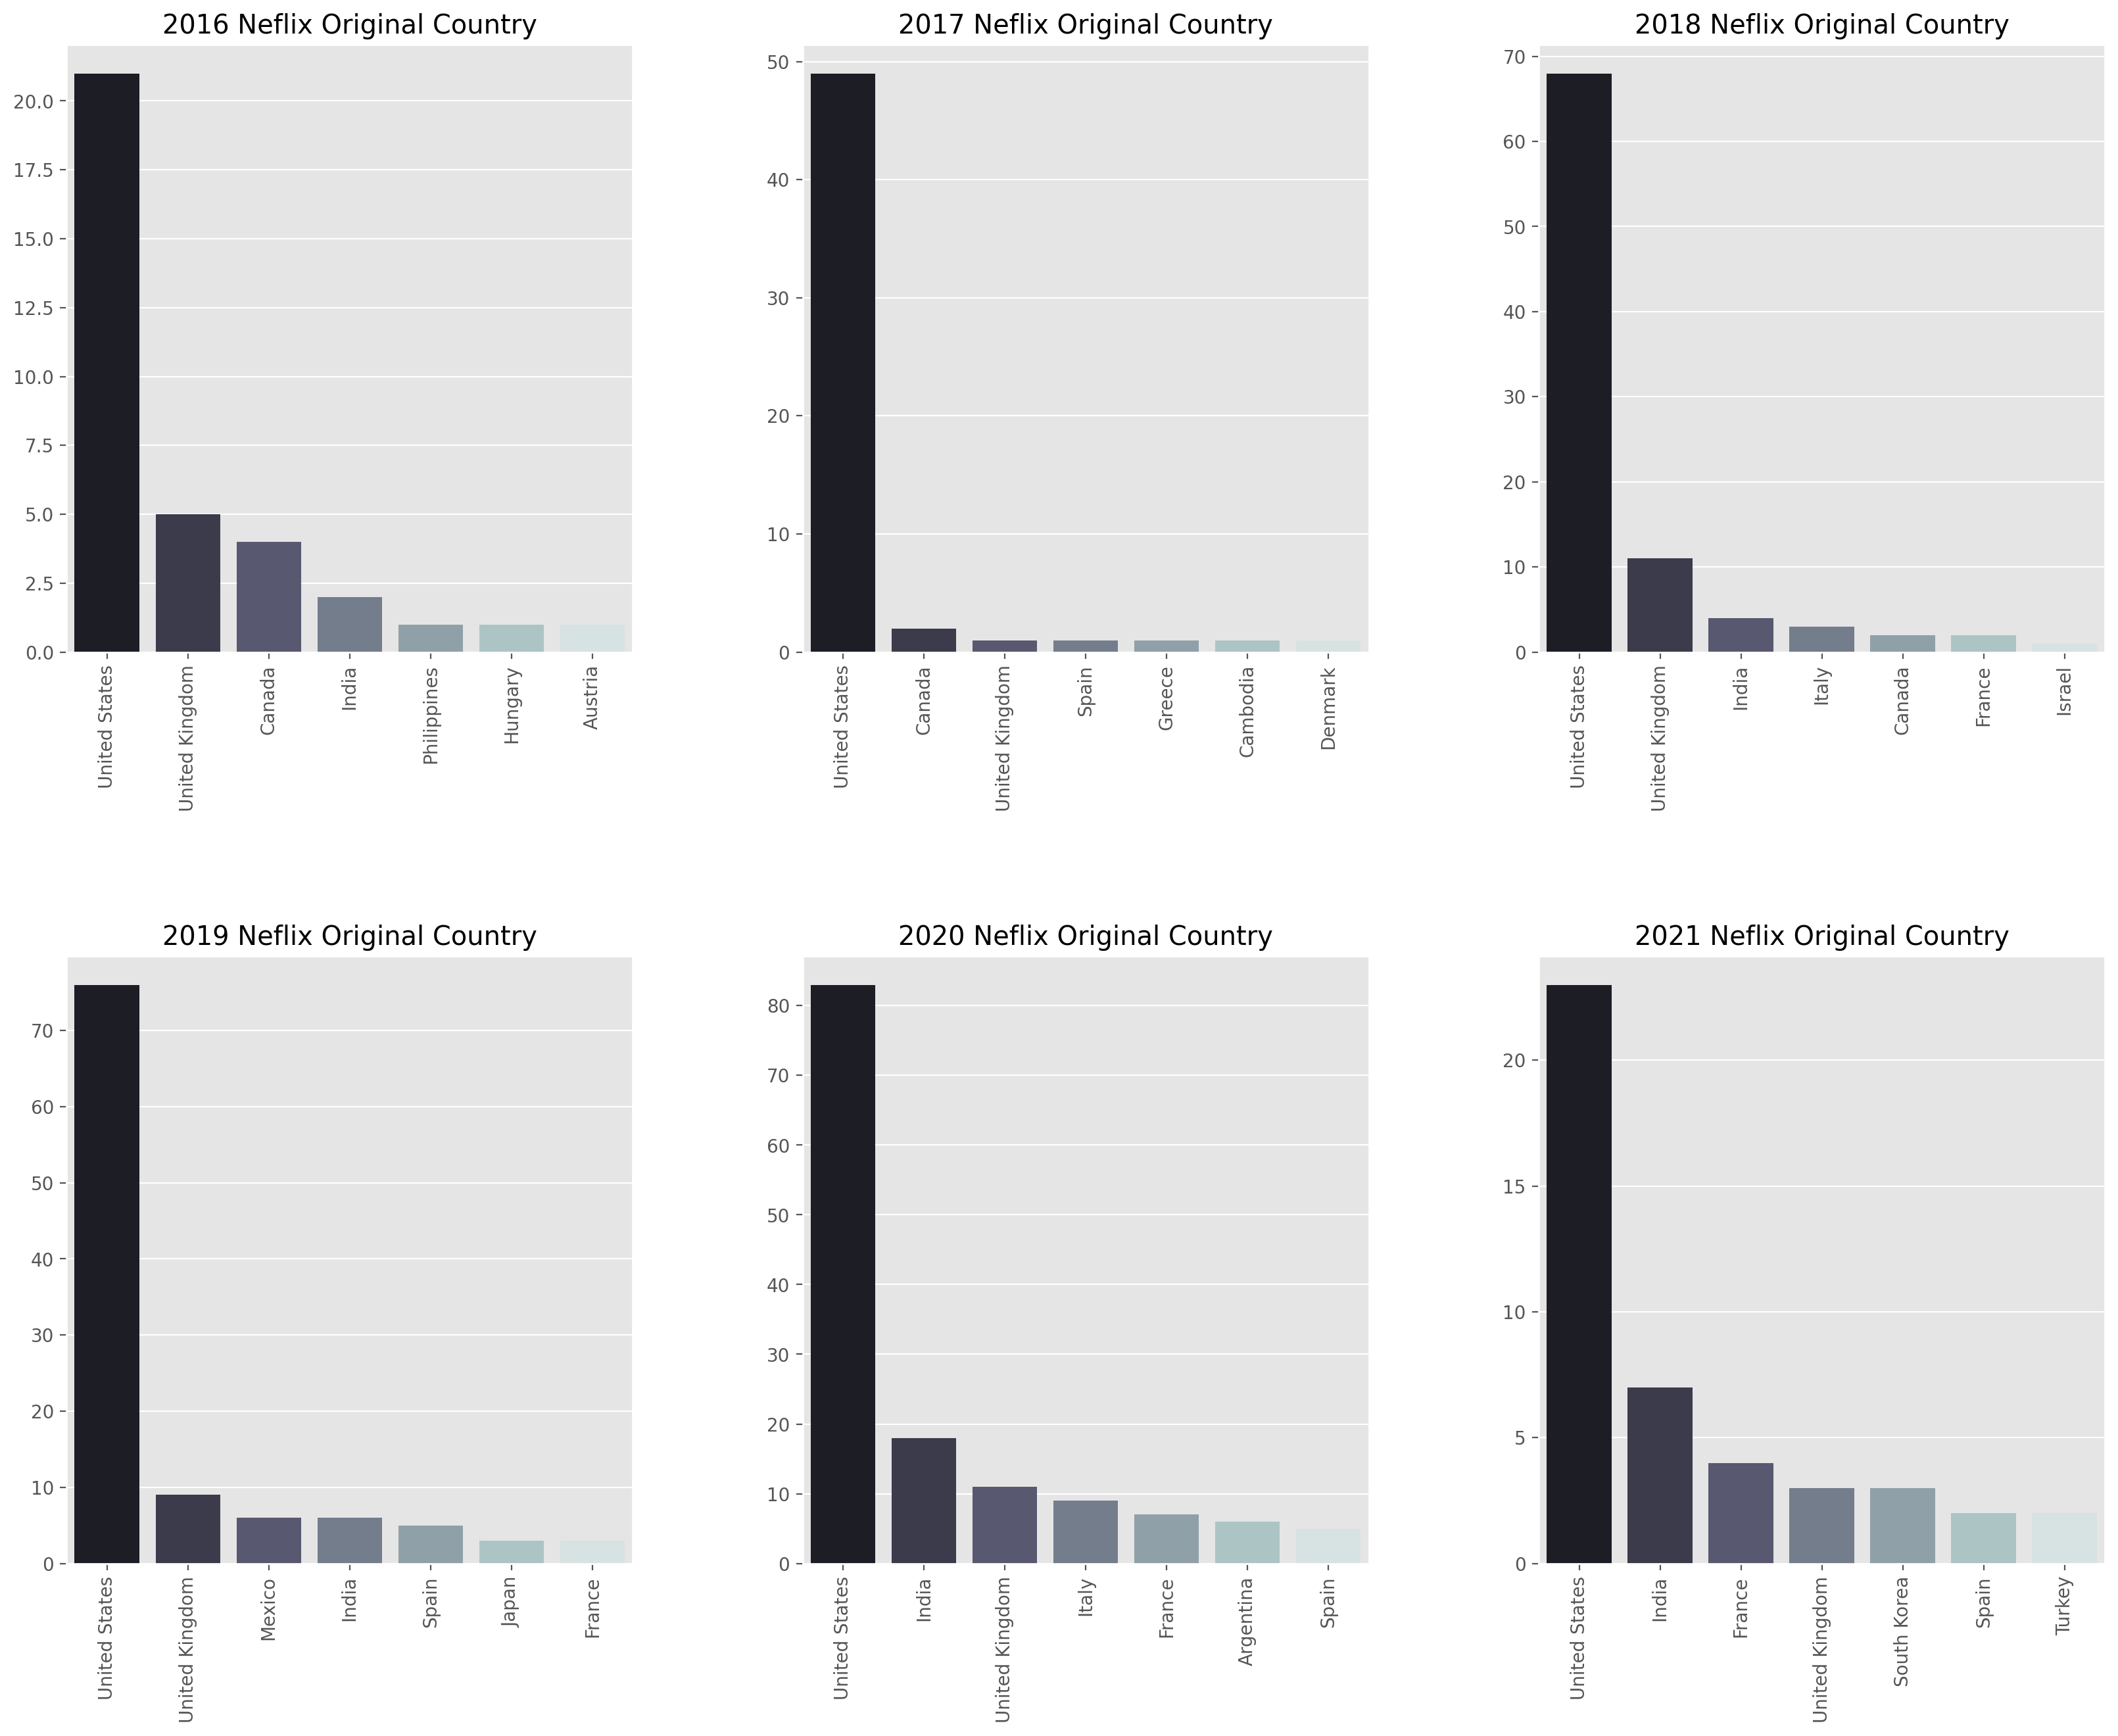

In [200]:
years = [2016, 2017, 2018, 2019, 2020, 2021]
nums = ((0,0), (0,1),(0,2), (1,0), (1,1), (1,2))

f, axes = plt.subplots(2,3, figsize = (15,10))
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.5)

for year, num in zip(years, nums):
    x,y = num
    bar = OG_country(df_OG, year)[:7].T

#     plt.figure(figsize=(10,10))
#     plt.subplot(3, 3, i + 1)
    sns.barplot(data=bar, palette = 'bone', ax=axes[x, y])
    axes[x,y].set_title(f"{year} Neflix Original Country")
    axes[x,y].tick_params(axis = "x" , labelrotation=90)
    
plt.show()

- 당연하게도 미국이 압도적이며, 영국, 캐나다, 인도가 다음으로 가장 활발한 움직임을 보여주고 있습니다.

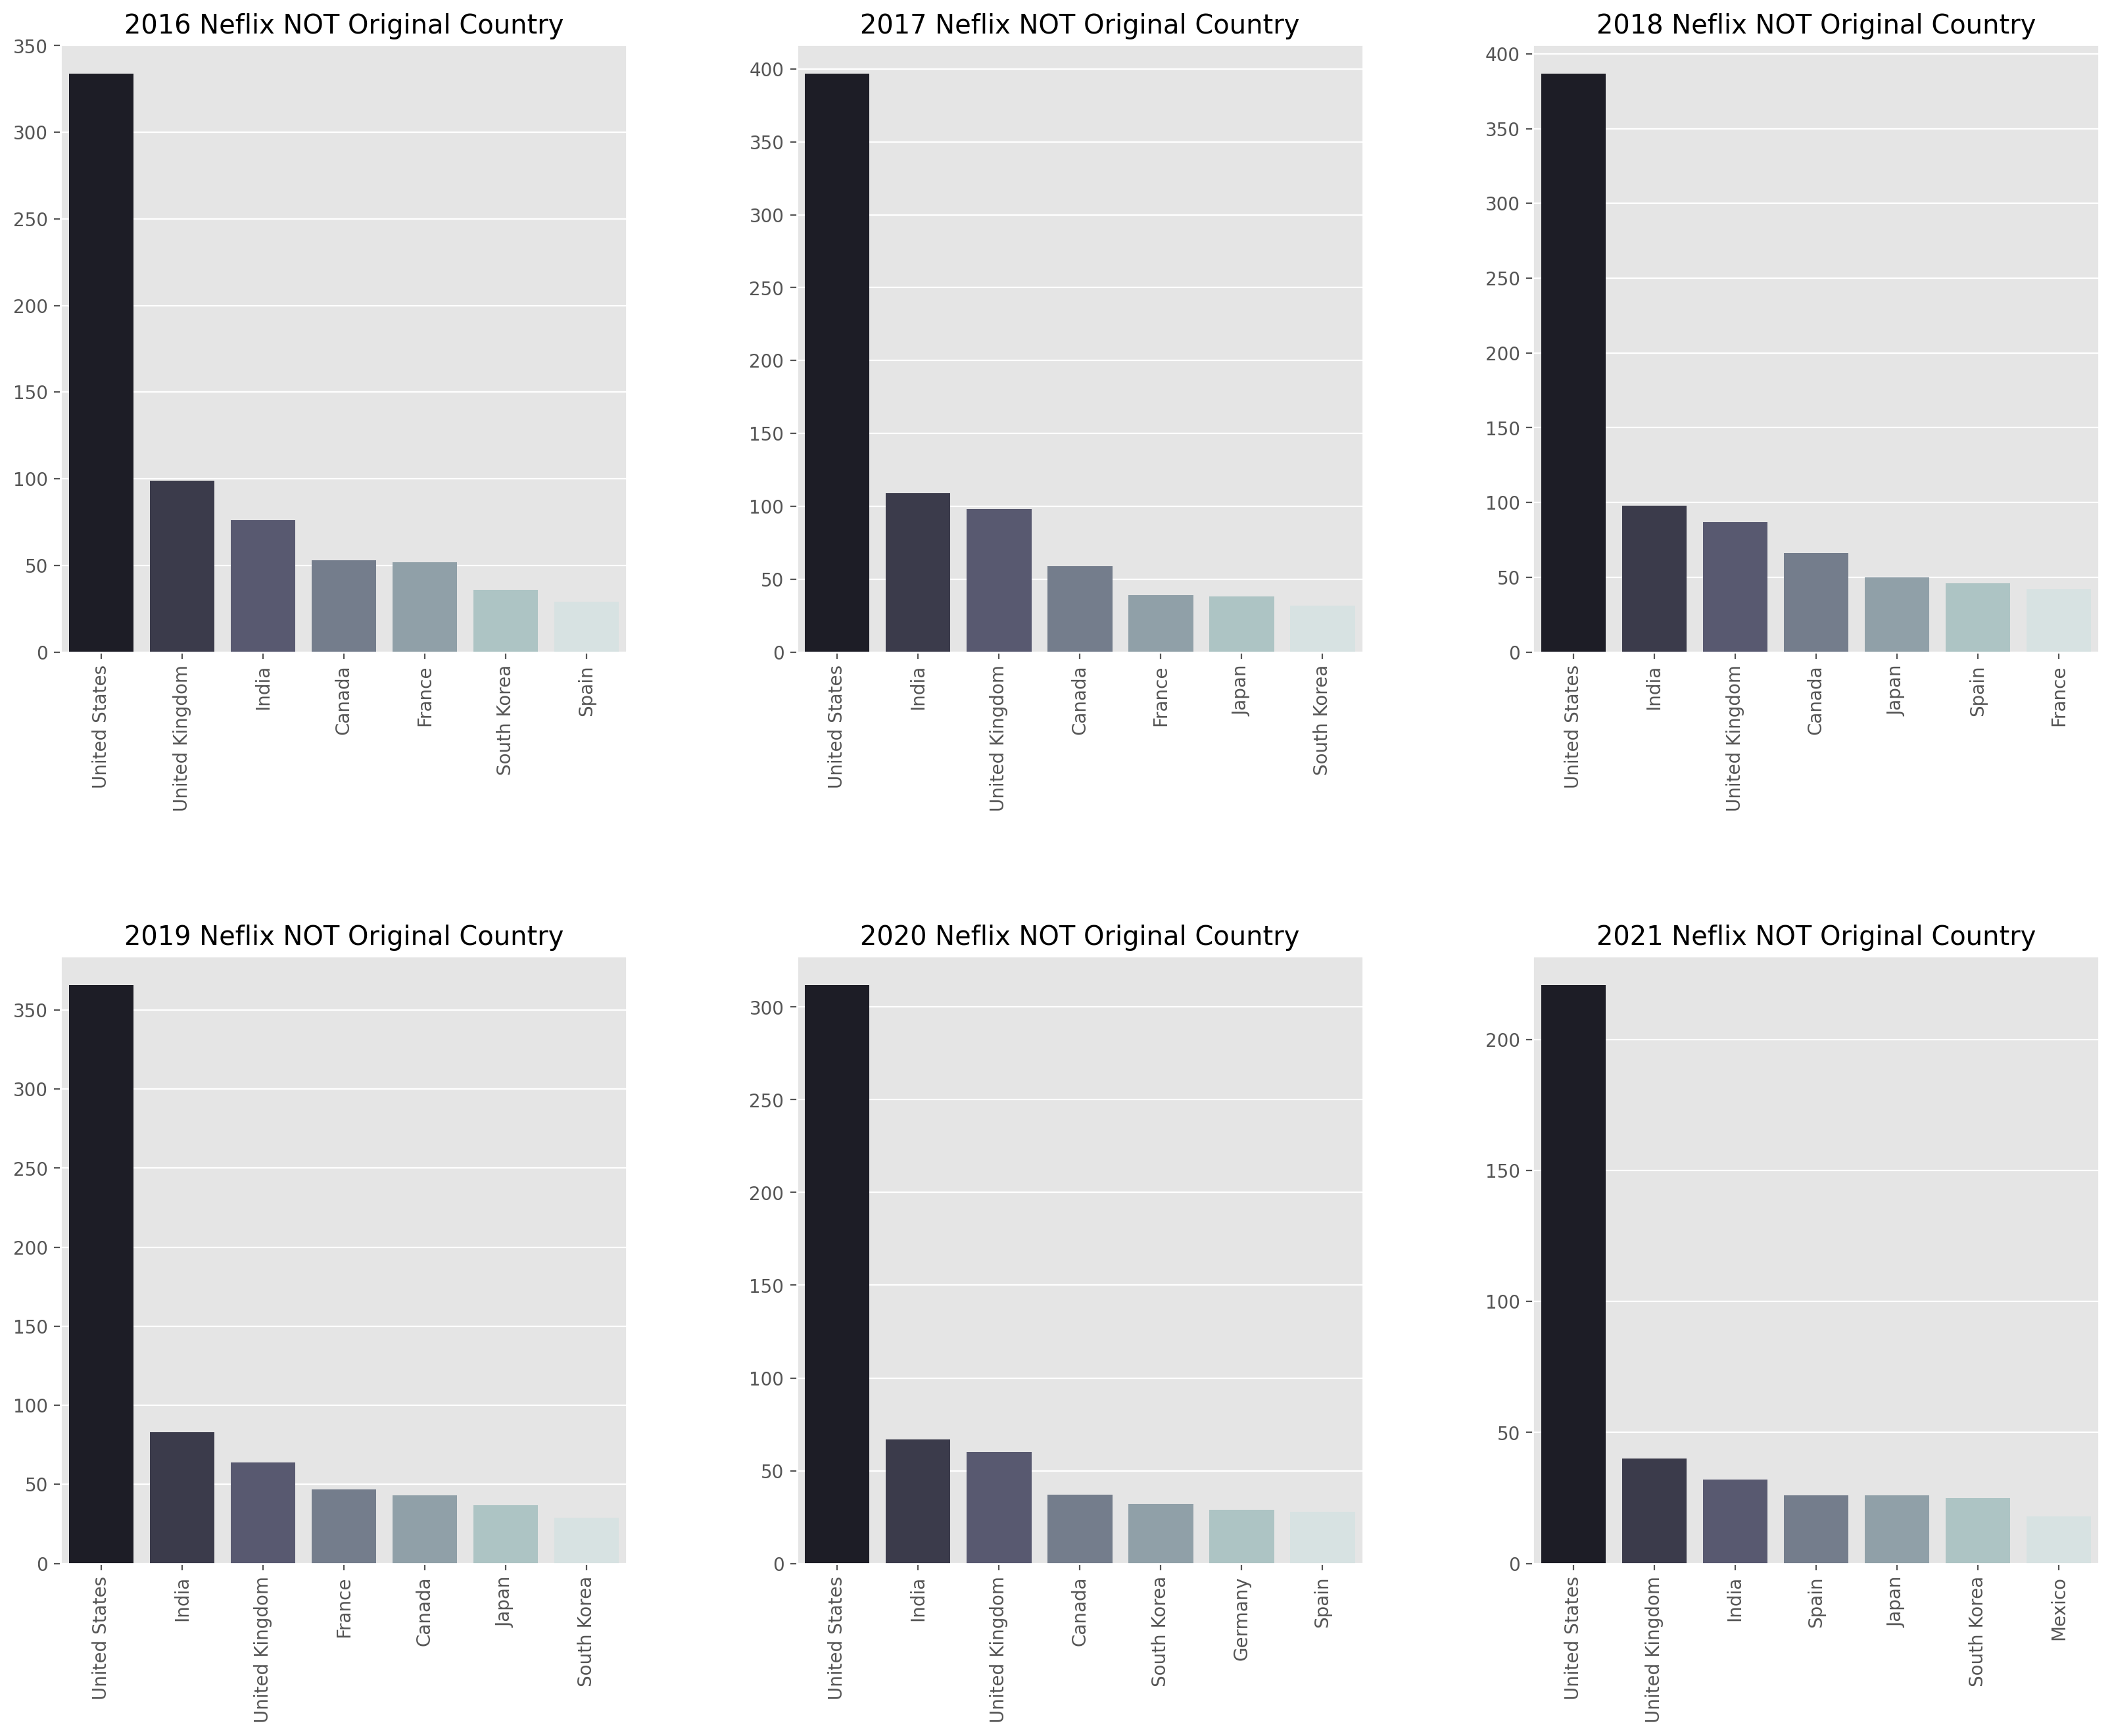

In [201]:
years = [2016, 2017, 2018, 2019, 2020, 2021]
nums = ((0,0), (0,1),(0,2), (1,0), (1,1), (1,2))

f, axes = plt.subplots(2,3, figsize = (15,10))
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.5)

for year, num in zip(years, nums):
    x,y = num
    bar = OG_country(df_NOG, year)[:7].T

#     plt.figure(figsize=(10,10))
#     plt.subplot(3, 3, i + 1)
    sns.barplot(data=bar, palette = 'bone', ax=axes[x, y])
    axes[x,y].set_title(f"{year} Neflix NOT Original Country")
    axes[x,y].tick_params(axis = "x" , labelrotation=90)
    
plt.show()

- 넷플릭스 오리지널이 아닌 일반 영화 드라마에서도 비슷한 추이를 보여주고 있습니다. 기존의 영화 및 드라마에서 활발한 활동을 보인 국가들에서 넷플릭스 오지리널 역시 많이 생산하는 것을 알 수 있습니다.

 ## 시청 등급별 비교

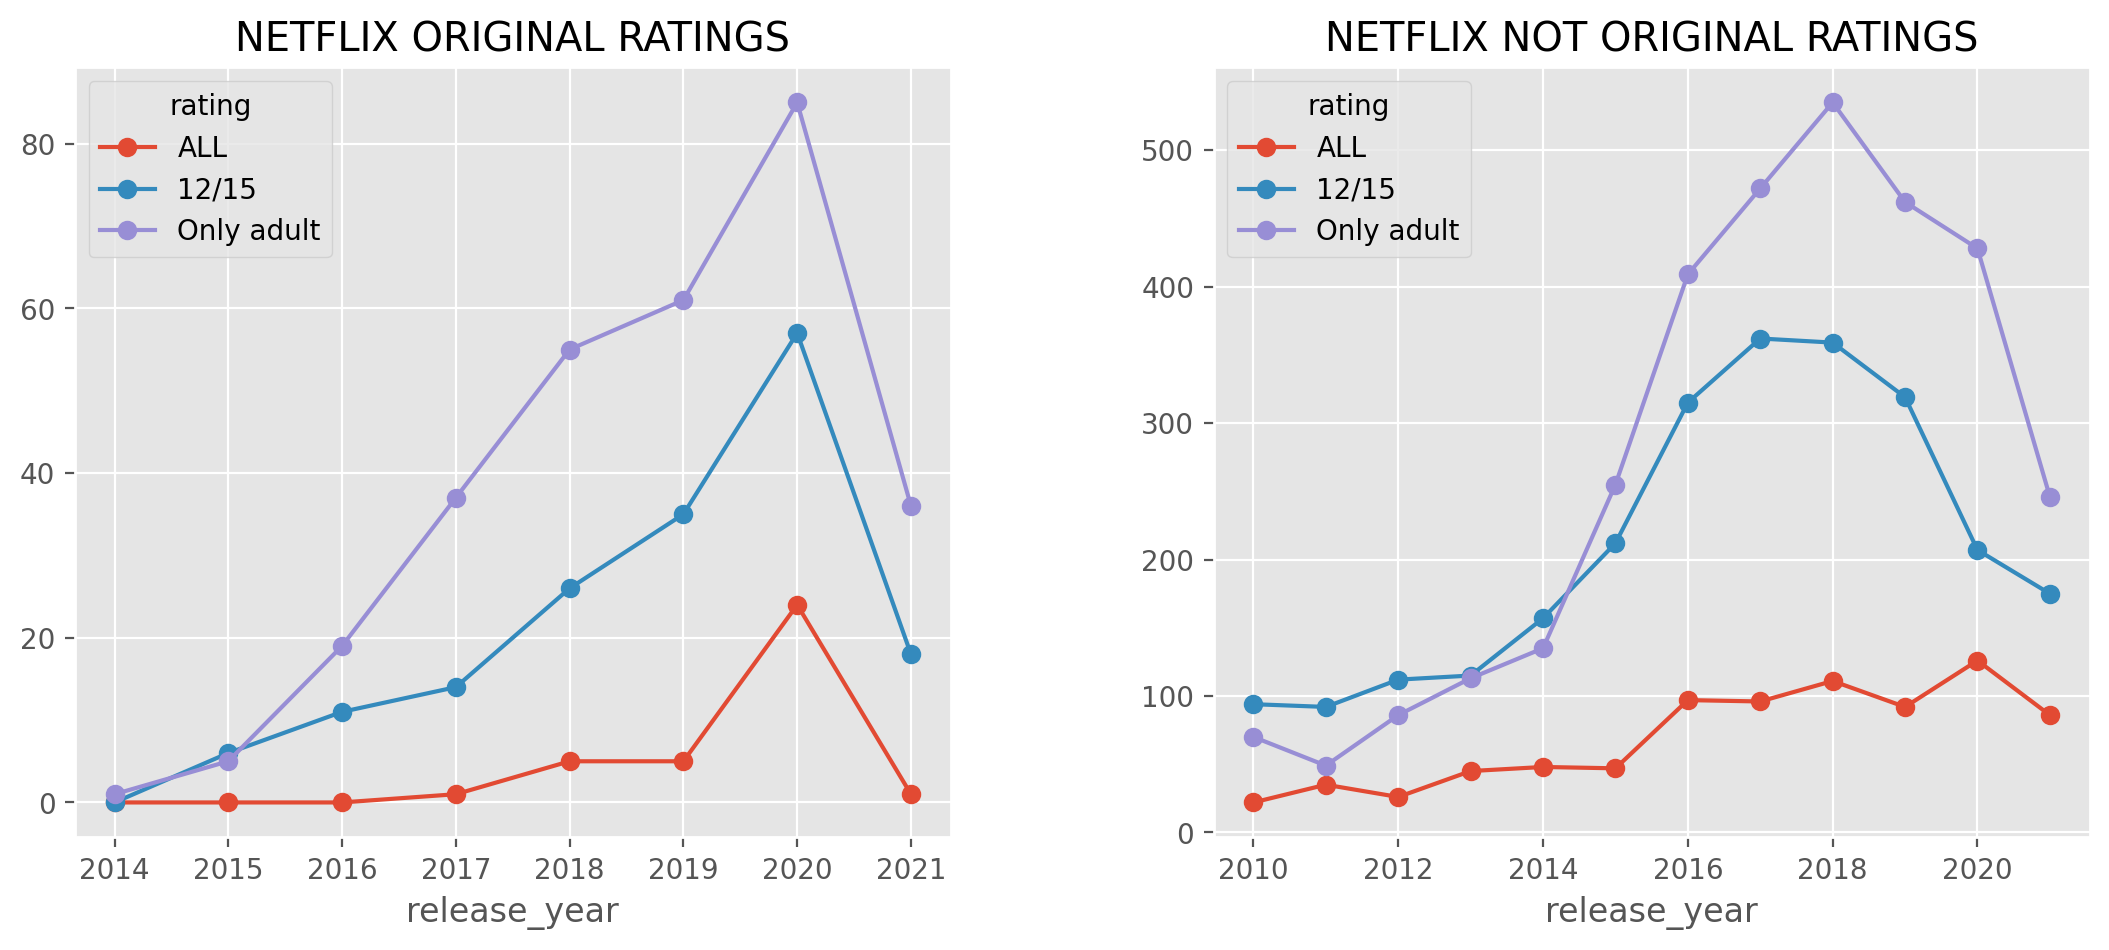

In [202]:
f, axes = plt.subplots(1,2, figsize = (9,5))
f.set_size_inches((13, 5))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.5)

df_OG.groupby(["rating", "release_year"]).size().unstack().rename(index= {0:"ALL", 1:"12/15", 2:"Only adult"}).fillna(0).T.plot(marker="o",ax = axes[0])
axes[0].set_title("NETFLIX ORIGINAL RATINGS")

df_NOG = df_NOG[df_NOG["release_year"] >= 2010]
df_NOG.groupby(["rating", "release_year"]).size().unstack().rename(index= {0:"ALL", 1:"12/15", 2:"Only adult"}).fillna(0).T.plot(marker="o",ax = axes[1])
axes[1].set_title("NETFLIX NOT ORIGINAL RATINGS")

plt.show()

- 크게 전체 이용가, 12/15세 이용가, 청소년관람불가 3가지로 나눠본 결과로 점점 더 청소년관람불가 작품 수가 증가하는 것을 알 수 있습니다. 이는 사람들이 계속해서 자극적인 작품을 찾는 것을 암시합니다.

## 넷플릭스 오리지널 vs 영화/드라마 by Score

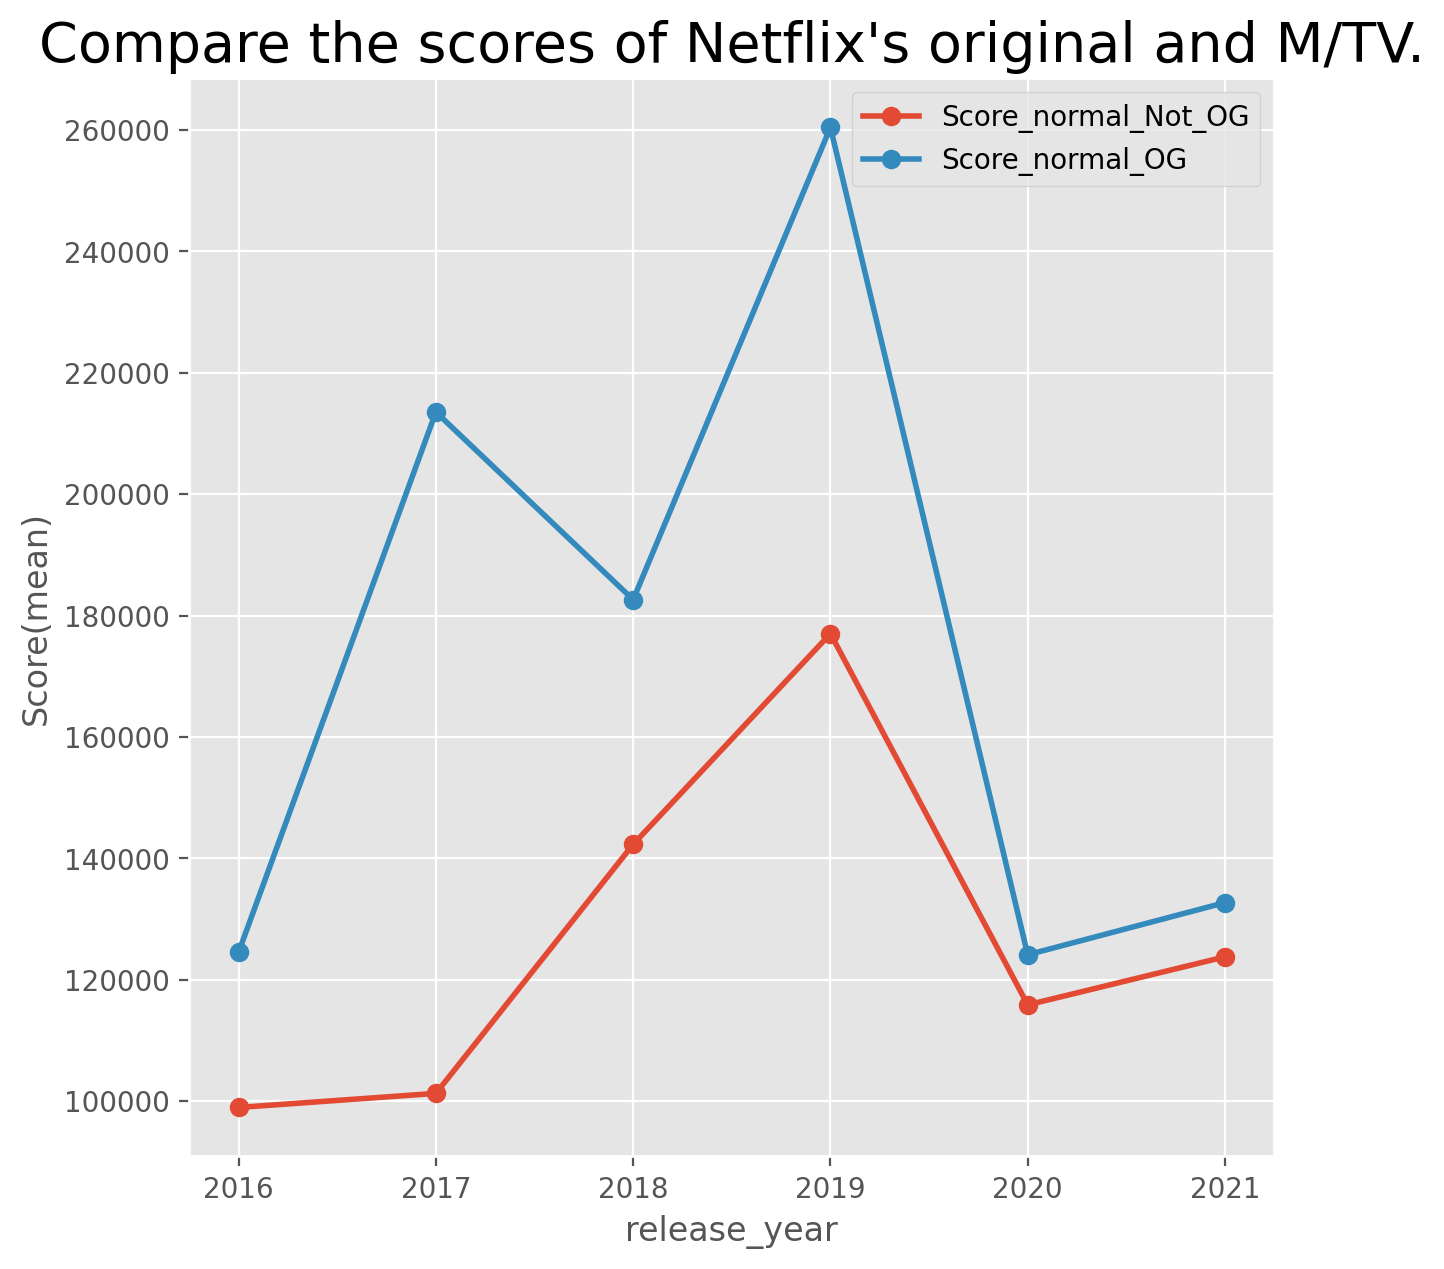

In [203]:
df_NOG_up = df_NOG[df_NOG["release_year"] >= 2016]
df_NOG_up["Score_normal_Not_OG"] = df_NOG_up["Score"]

df_OG_up = df_OG[df_OG["release_year"] >= 2016]
df_OG_up["Score_normal_OG"] = df_OG_up["Score"]


plt.figure(figsize= (7,7))
df_NOG_up.groupby(["release_year"])["Score_normal_Not_OG"].mean().plot(marker = "o", linewidth = 2)
df_OG_up.groupby(["release_year"])["Score_normal_OG"].mean().plot(marker = "o", linewidth = 2)

plt.legend()
plt.title("Compare the scores of Netflix's original and M/TV.", fontsize= 20)
plt.ylabel("Score(mean)")

plt.show() # 평균적으로 Netflix 오리지널의 Score가 더 높다는 것을 알 수 있다.

- Score(평점 * 리뷰 수)를 기준으로 넷플릭스 오리지널과 영화/드라마를 비교해봤습니다. 2016년 이후 기준으로 확인한 결과 넷플릭스 오리지널의 컨텐츠의 점수가 일반적으로 높다는 것을 알 수 있습니다. 이는 넷플릭스 오리지널이 조금 더 소비자들이 원하는 작품을 출판한다고 생각할 수 있습니다.

### 장르별 점수 비교(넷플릭스 오리지널 vs 영화/드라마)

In [204]:
def genres(df: pd.DataFrame):
    genres = df[df["release_year"] >= 2016]["listed_in"].tolist()
    Scores = df[df["release_year"] >= 2016]["Score"].tolist()
    
#     print(genres)
#     print(add_datedes)
    
    gnres = []
    scores = []
    flg = len(gnres)
    for gnre, Score in zip(genres, Scores):
        gnres += gnre.split(", ")

        c = len(gnres) - flg
        flg = len(gnres)
        for i in range(c):
            scores.append(Score)

#     dfs = pd.DataFrame({f"genre": gnres, "Scores": scores})
#     dfs = pd.DataFrame(dfs[f"genre"].value_counts())
    return gnres, scores

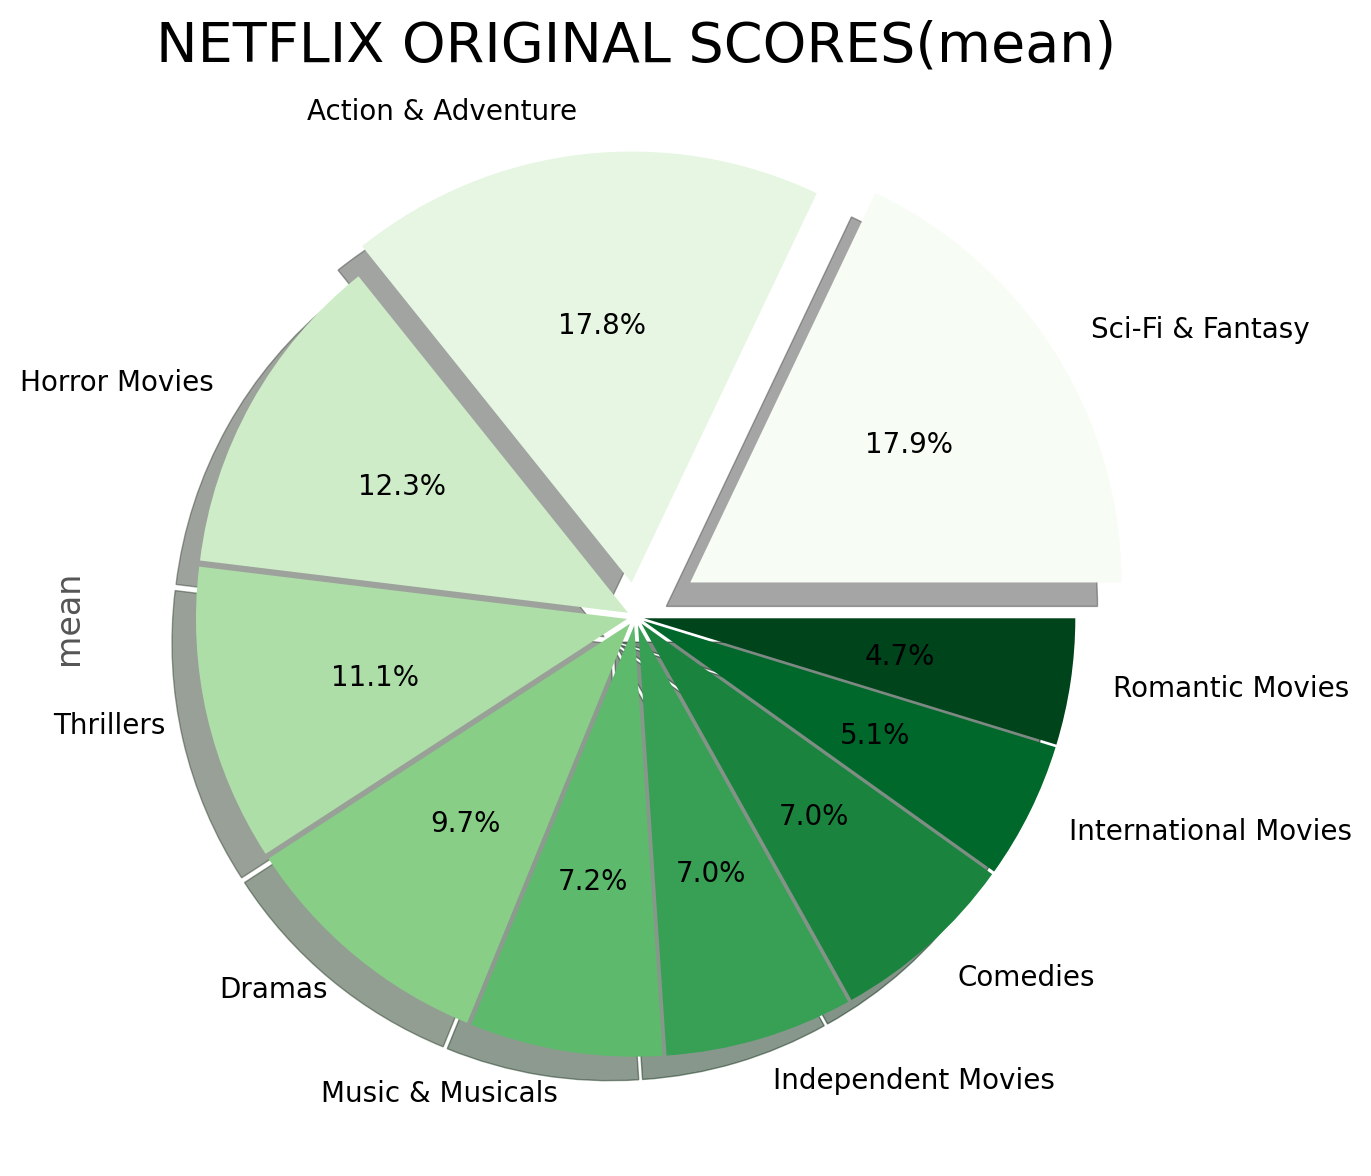

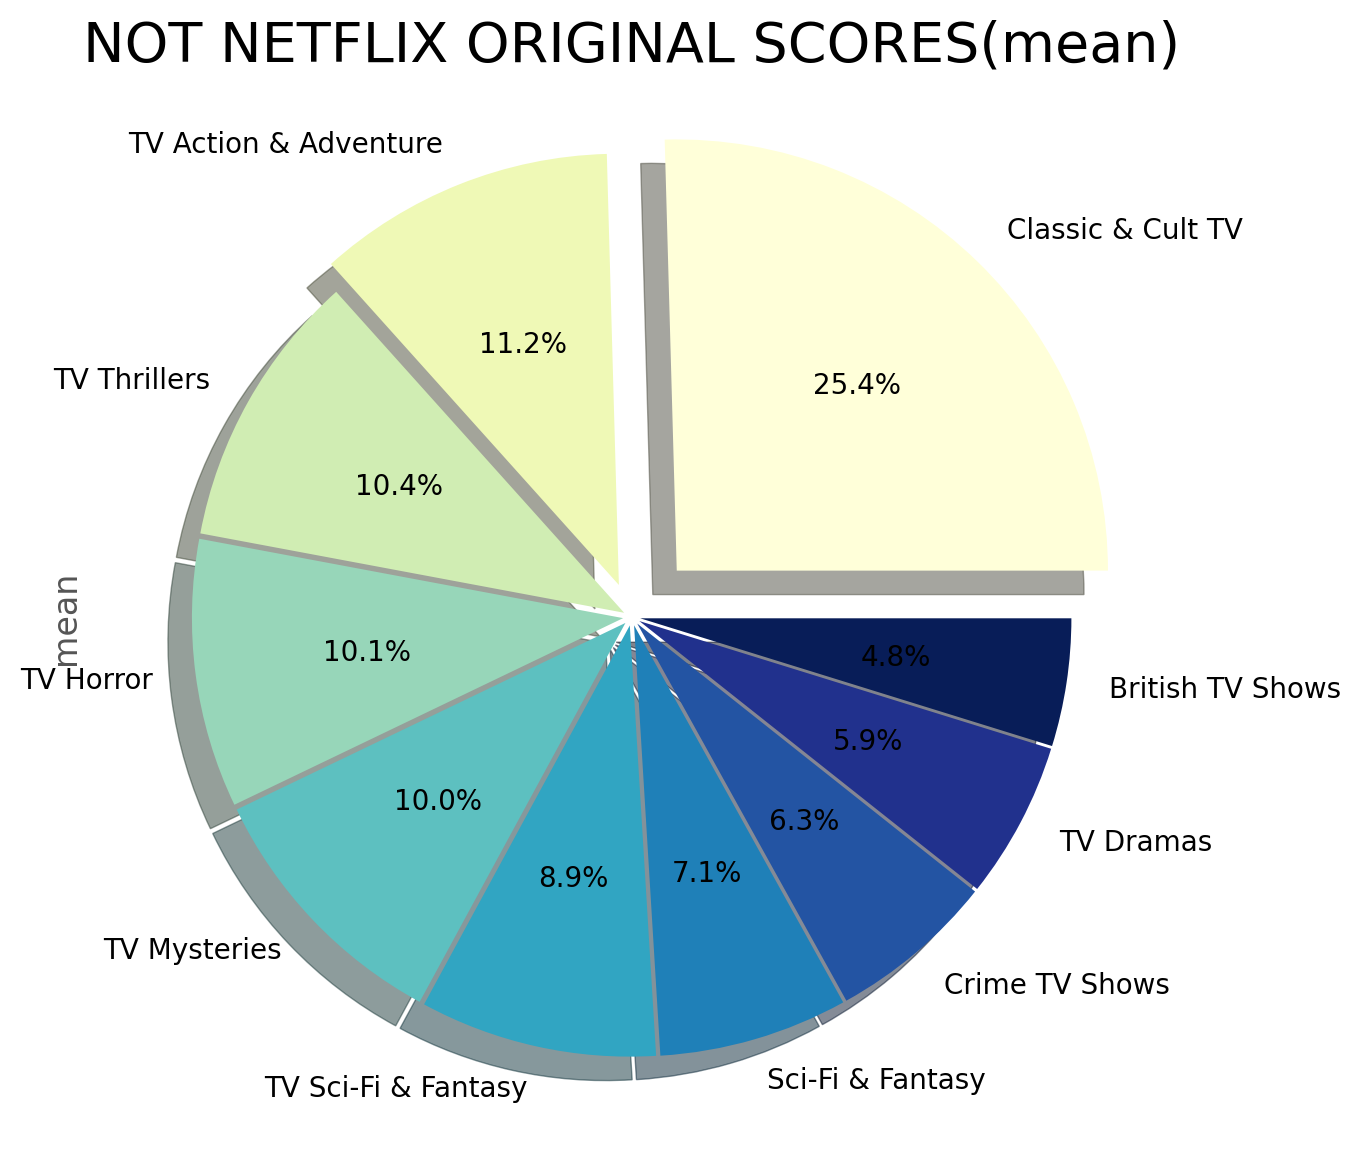

In [205]:
gnres, scores = genres(df_OG)

dfs = pd.DataFrame({f"genre": gnres, "Scores": scores})


dfs["Scores"] = dfs["Scores"].apply(lambda x: round(x))
OGs = dfs.groupby("genre")["Scores"].agg(["mean","count"])

colors = plt.cm.Greens(np.linspace(0, 1, 10))
explode = [0.15, 0.08, 0.02, 0.02, 0.02, 0.02, 0.02 ,0.02 , 0.02 ,0.02 ]
OGs[OGs["count"] >= 10].sort_values(by= "mean", ascending=False)["mean"][:10].plot(kind = "pie", colors= colors, explode = explode ,figsize = (7,7), autopct="%0.1f%%", shadow=True)
plt.title("NETFLIX ORIGINAL SCORES(mean)", fontsize = 20)
plt.show()

######################################
gnres, scores = genres(df_NOG)

dfs = pd.DataFrame({f"genre": gnres, "Scores": scores})
dfs["Scores"] = dfs["Scores"].apply(lambda x: round(x))
Not_OG = dfs.groupby("genre")["Scores"].agg(["mean","count"])

colors = plt.cm.YlGnBu(np.linspace(0, 1, 10))
explode = [0.15, 0.08, 0.02, 0.02, 0.02, 0.02, 0.02 ,0.02 , 0.02 ,0.02 ]
Not_OG[Not_OG["count"] >= 10].sort_values(by="mean",ascending=False)["mean"][:10].plot(kind = "pie", colors= colors, explode = explode ,figsize = (7,7), autopct="%0.1f%%", shadow=True)
plt.title("NOT NETFLIX ORIGINAL SCORES(mean)", fontsize = 20)
plt.show()


- 장르별 Score 역시 오리지널 작품들과 일반 영화/드라마 작품들의 추이가 비슷한 것을 알 수 있습니다. Action & Adventure와 Thillers와 같이 활동적인 장르들이 기본적으로 좋은 평가를 받는 것을 확인할 수 있었습니다. 반대로 작품 수가 가장 많았던 드라마나 코미디는 좋은 Score를 받지 못한 것을 확인할 수 있습니다. 이는 소비자들이 자극적인 작품들에 조금 더 후한 평가를 준다고 추측할 수 있습니다.

# 번외 



## 가장 Score가 높은 배우는????

In [206]:
castes = df["cast"].tolist()
scores = df["Score_normal"].tolist()

cast_li = []
scores_li = []
flg = len(cast_li)
for cast, score in zip(castes, scores):
    cast_li += cast.split(", ")


    c = len(cast_li) - flg
    flg = len(cast_li)
    for i in range(c):
        scores_li.append(score)
        

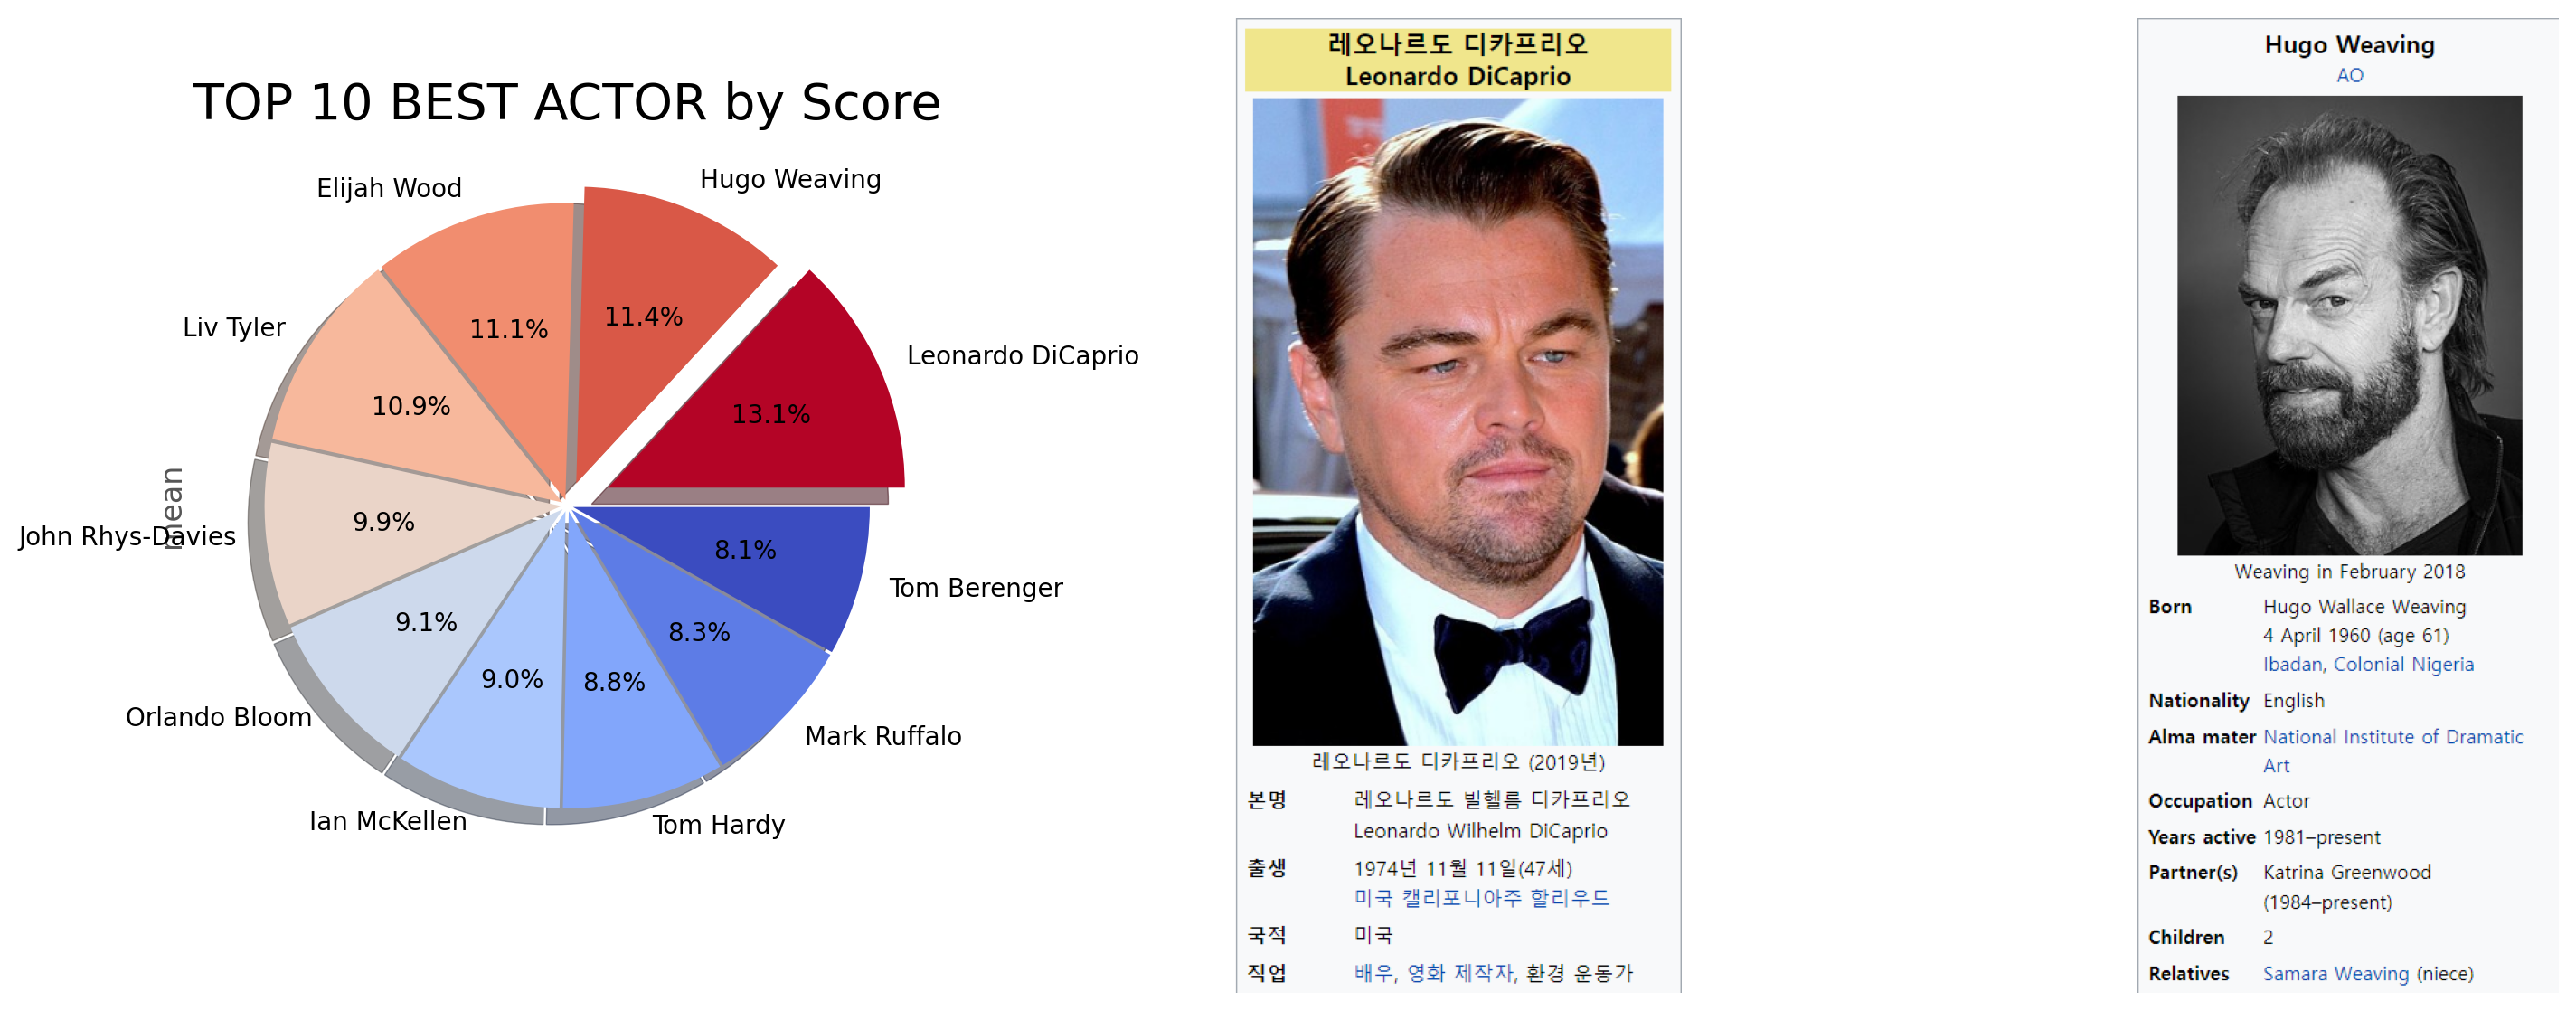

In [207]:
from PIL import Image

cast_score = pd.DataFrame({"cast": cast_li, "Score_normal" : scores_li})
group = cast_score.groupby("cast").agg(["mean", "count"])["Score_normal"]


path = "../image"
leo = "/디카프리오.PNG"
Hugo = "/Hugo_Weaving.PNG"


plt.subplot(131)
colors = plt.cm.coolwarm_r(np.linspace(0, 1, 10))
explode = [0.15, 0.08, 0.02, 0.02, 0.02, 0.02, 0.02 ,0.02 , 0.02 ,0.02 ]
group[group["count"] >= 5].sort_values(by="mean", ascending=False)[:10]["mean"].plot(kind="pie", colors=colors, explode = explode, shadow =True ,figsize = (18,7), autopct="%0.1f%%")
plt.title("TOP 10 BEST ACTOR by Score", fontsize = 20)

plt.subplot(132)
img = Image.open(path + leo)
plt.style.use("default")
plt.imshow(img)
plt.axis('off')
plt.grid(False)

plt.subplot(133)
img = Image.open(path + Hugo)
plt.style.use("default")
plt.imshow(img)
plt.axis('off')
plt.grid(False)
plt.show()

plt.show()

## 가장 Score가 높은 감독은???

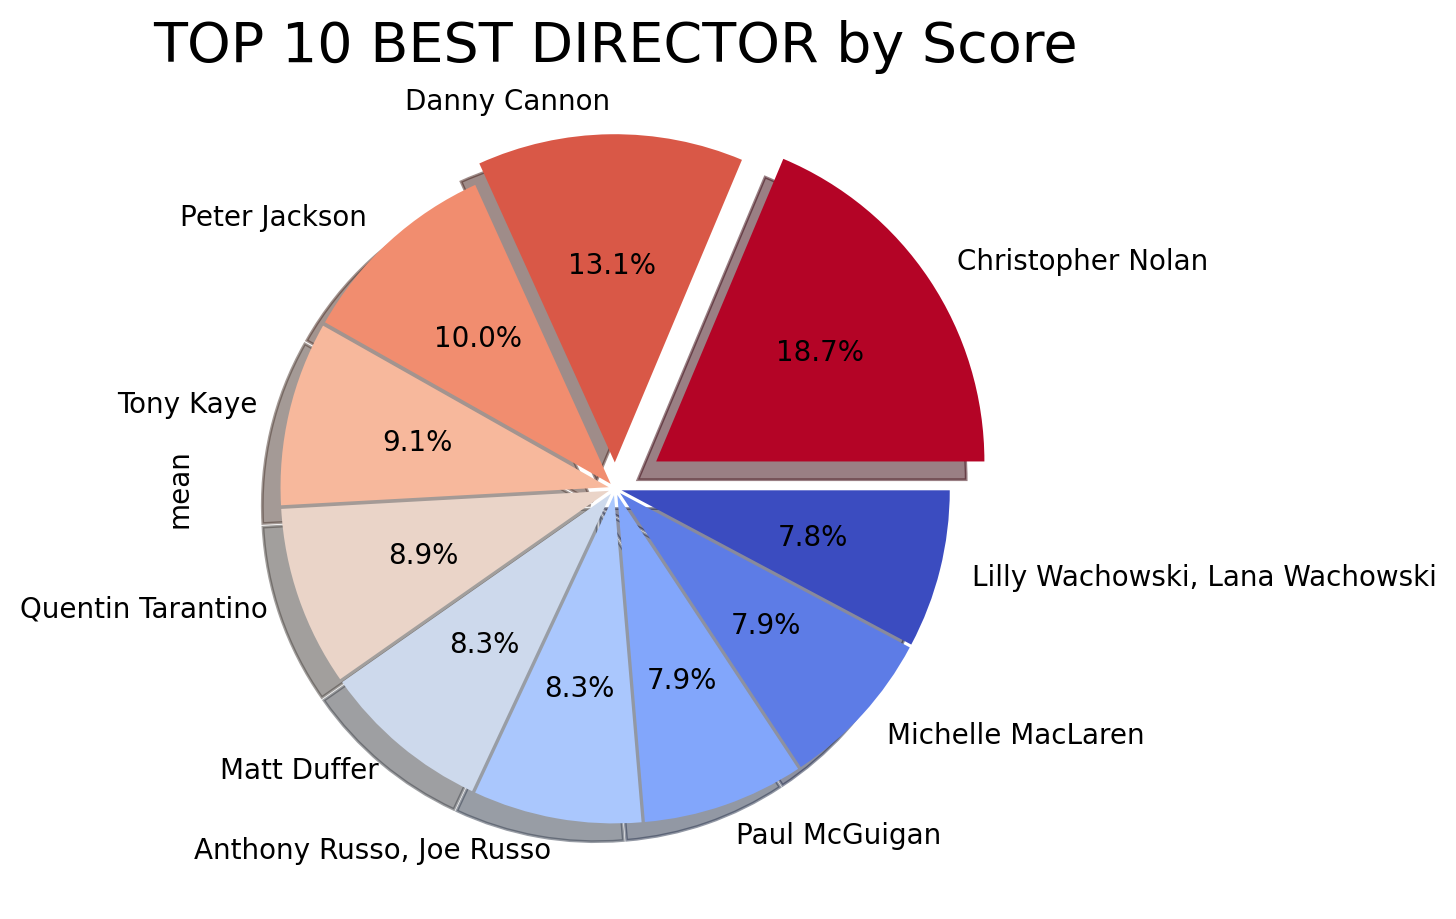

In [208]:
plt.subplot(131)
colors = plt.cm.coolwarm_r(np.linspace(0, 1, 10))
df.groupby("director")["Score_normal"].agg(["mean", "count"]).sort_values(by="mean", ascending = False)["mean"][:10].plot(kind="pie", colors=colors, explode = explode, shadow =True ,figsize = (18,7), autopct="%0.1f%%")
plt.title("TOP 10 BEST DIRECTOR by Score", fontsize = 20)
plt.show()